# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm,binom,expon,poisson,geom

# Reading data

In [2]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


# Shape of the data is checked. We have 550068 rows and 10 columns

In [ ]:
df.shape

(550068, 10)

# Dataset is checked for any missing values. We could see there are no missing values in the given dataset. All categorical columns are object type and Continuos columns are in integer type.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# Column Marital Status is converted from integer to object data type

In [ ]:
df['Marital_Status']=df['Marital_Status'].astype('str')

#Non Graphical Descriptive Stats using Describe function

## Pandas Describe function is used to find the central tendency and to find the measures of dispersion of data columns

In [ ]:
df.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


# Observations:
## With the average and median data we get to know where most of data falls and IQR range of values in numeric data columns to get idea of target audience so far in a nutshell.

# Univariate Analysis
## Code is written to consider all the columns(excluding User_ID) and each column data and Data Count is visualised using histplot

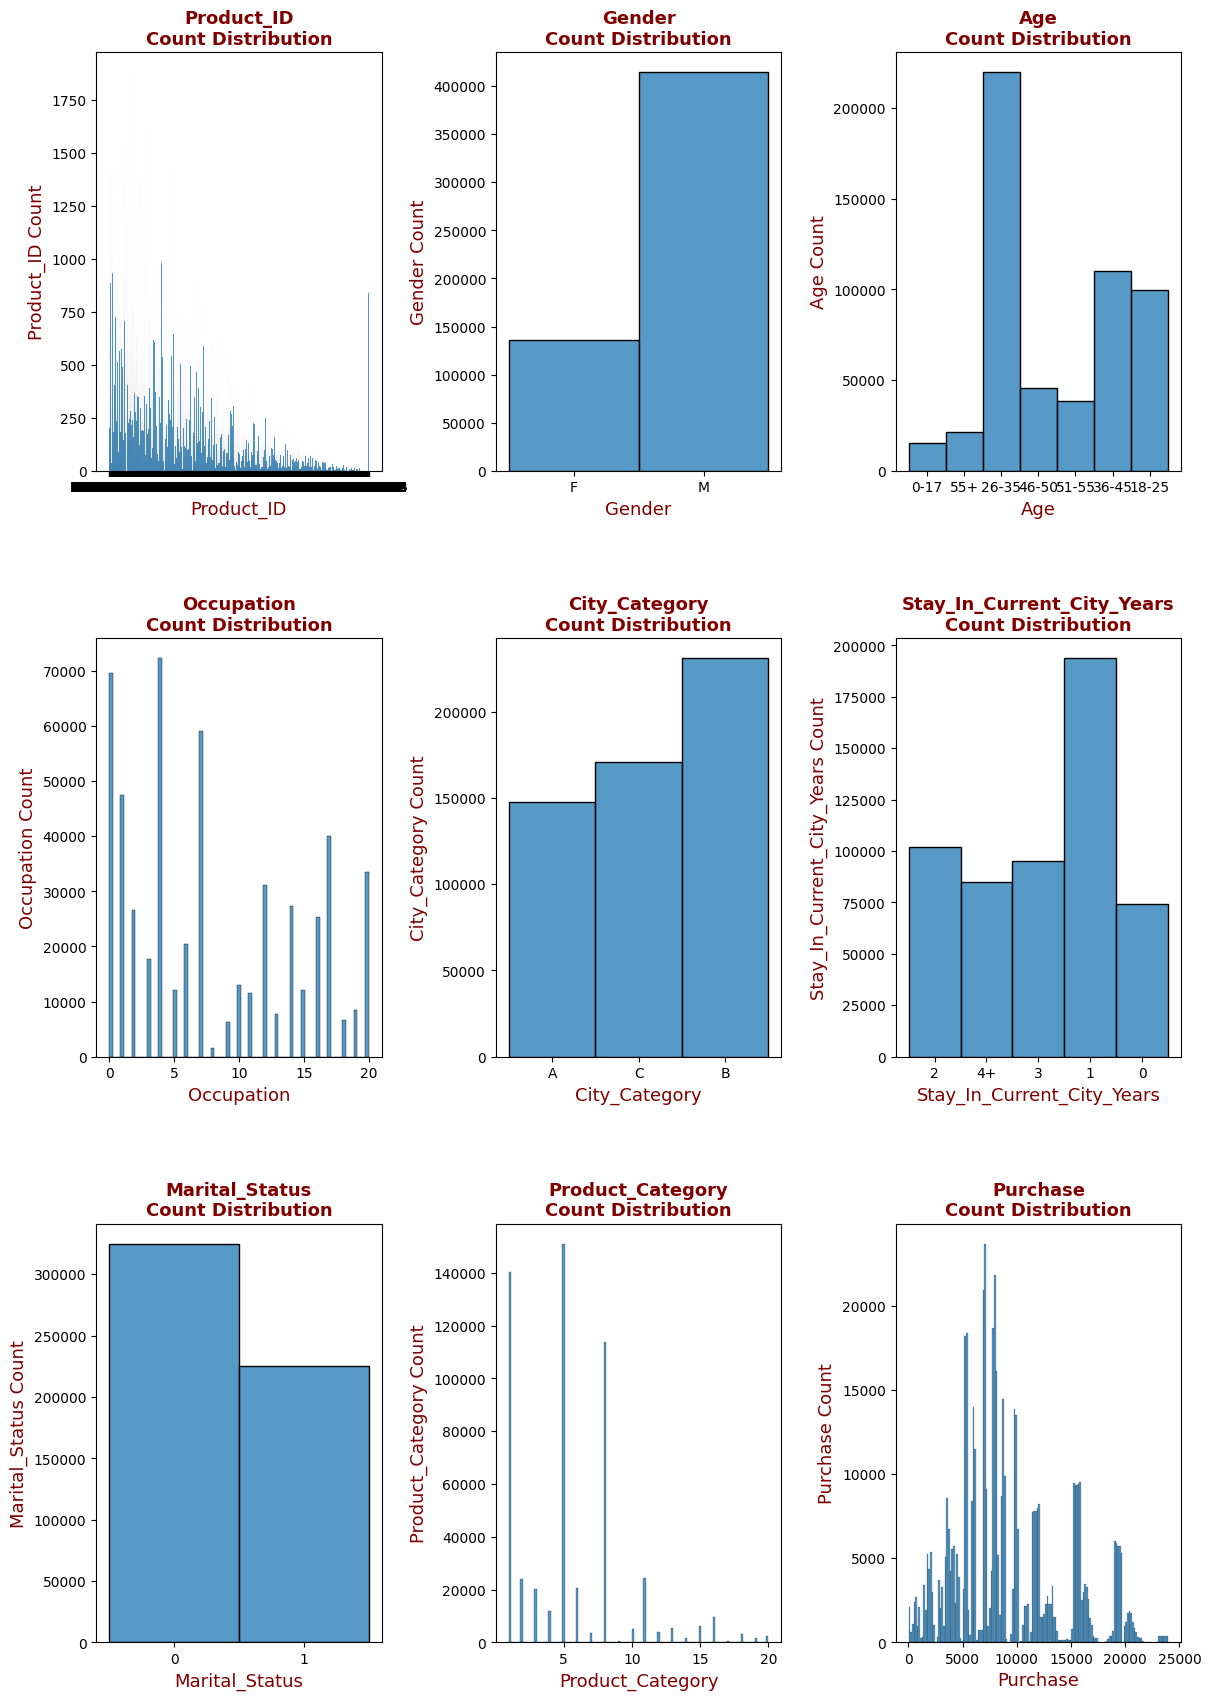

In [ ]:
df1=df.loc[:,"Product_ID":"Purchase"]
attrs=[]
for i in df1.columns:
  attrs.append(i)
fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
fig.subplots_adjust(top=1.7,wspace=0.4,hspace=0.4)
count=0
for i in range(3):
  for j in range(3):
    sns.histplot(data=df1, x=attrs[count],ax=axis[i,j])
    axis[i,j].set_title(f"{attrs[count]}\nCount Distribution",fontsize=13,color='maroon',fontweight='bold')
    axis[i,j].set_xlabel(f'{attrs[count]}', fontsize=13, color='maroon')
    axis[i,j].set_ylabel(f'{attrs[count]} Count', fontsize=13, color='maroon')
    count+=1

# Observations:

## We could see most of the customers are male with 3x ratio compared to females.
## Most of the customers come under age 26-35 which can concluded mostly youths as target audience.
## Most of the customers are having 5 years of occupation experience.
## Most of them currently stayed for 1 year in the city.
## Most of the purchase amount comes between 5000 to 10000 range

# UniVariate Analysis continued

## Box plot is used to visualise the numeric data columns in determining central tendency and measures of dispersion

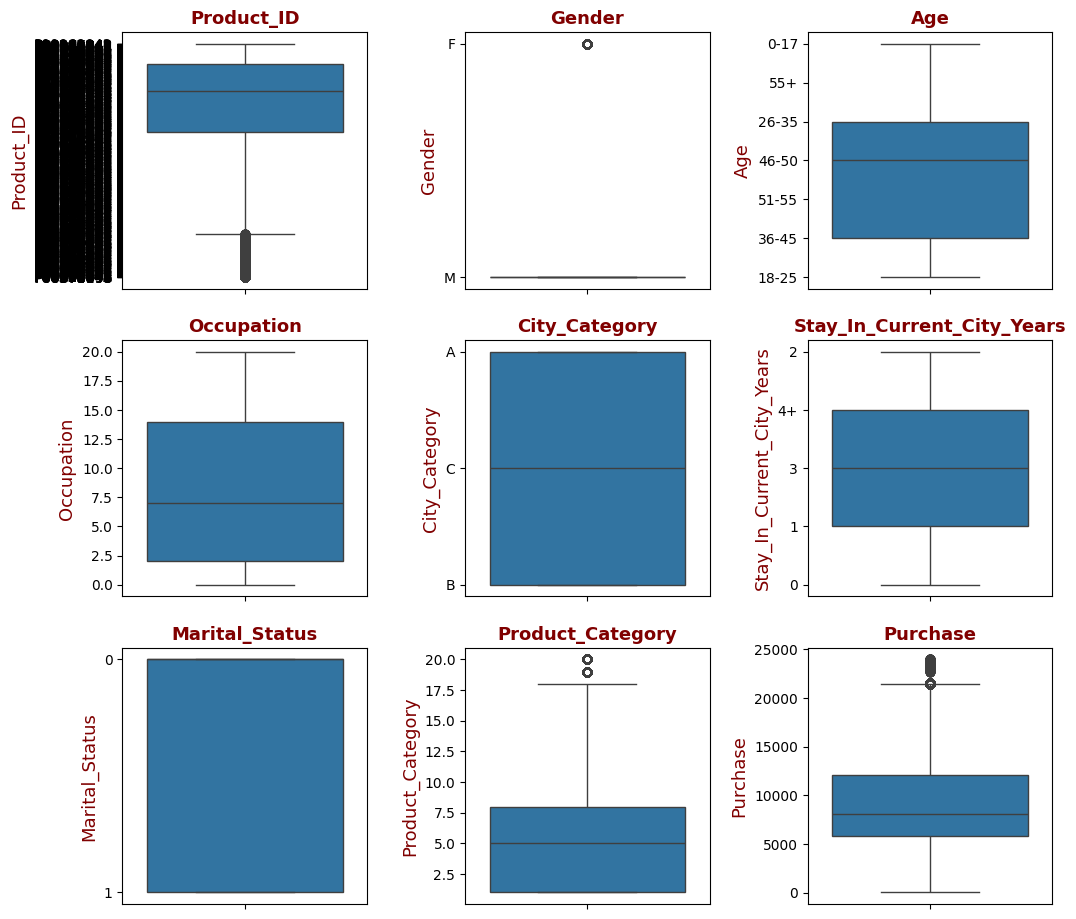

In [ ]:
attrs = ['Product_ID', 'Gender', 'Age','Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status','Product_Category','Purchase']
fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
fig.subplots_adjust(top=1.2,wspace=0.4)
count=0
for i in range(3):
  for j in range(3):
    sns.boxplot(data=df, y=attrs[count],ax=axis[i,j])
    axis[i,j].set_title(f"{attrs[count]}",fontsize=13,color='maroon',fontweight='bold')
    axis[i,j].set_ylabel(f'{attrs[count]}',fontsize=13, color='maroon')
    count+=1

# Observations:

## We can see that Occupation is having a median of 7.5 years,median product_category to be 5 and Purchase having IQR range between 6000 to 13000.

# BiVariate Analysis

## A boxplot  of  Purchase Vs Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status and Product_Category is plotted and observations are recorded

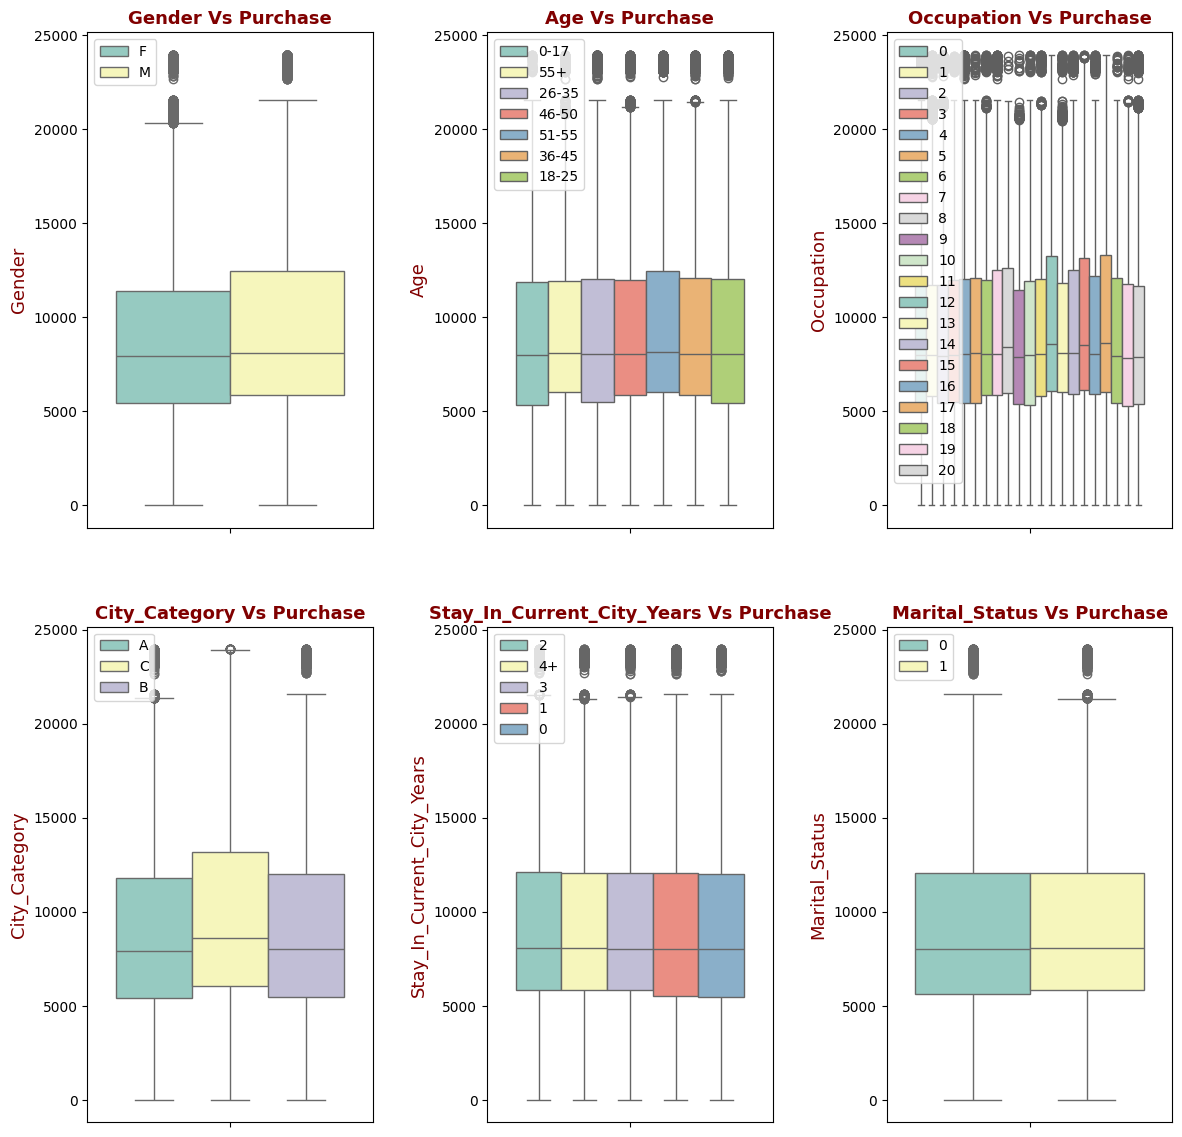

In [ ]:
attrs = ['Gender', 'Age','Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status','Product_Category']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))
fig.subplots_adjust(top=1.2,wspace=0.4)
count=0
for i in range(2):
  for j in range(3):
    sns.boxplot(data=df,y='Purchase',hue=attrs[count],ax=axis[i,j],palette='Set3')
    axis[i,j].set_title(f"{attrs[count]} Vs Purchase",fontsize=13,color='maroon',fontweight='bold')
    axis[i,j].set_ylabel(f'{attrs[count]}',fontsize=13, color='maroon')
    axis[i,j].legend(loc='upper left')
    count+=1

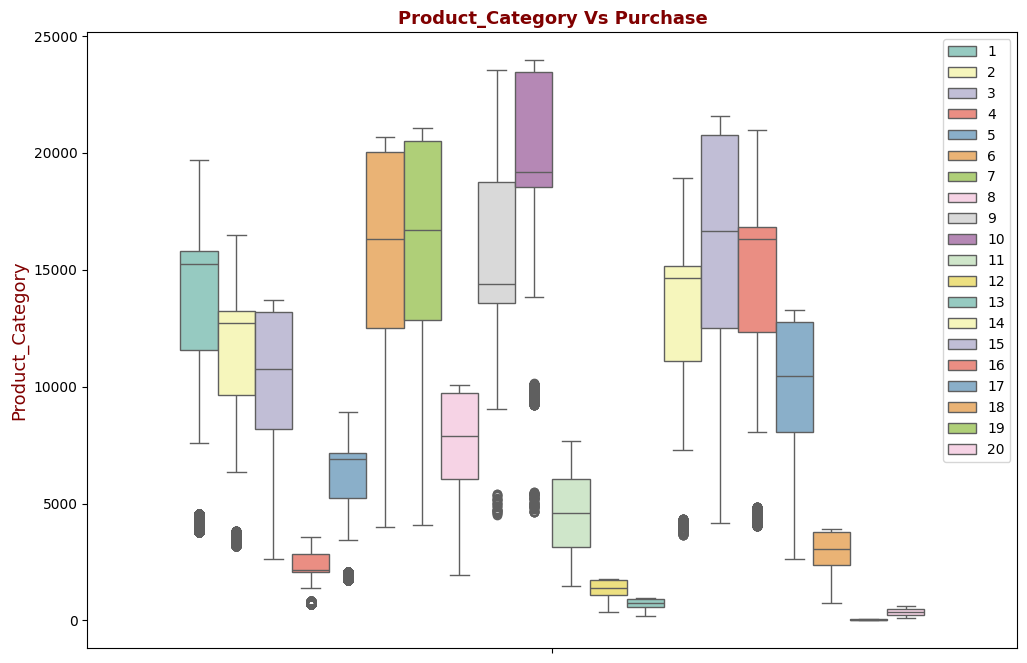

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,y='Purchase',hue='Product_Category',palette='Set3')
plt.title("Product_Category Vs Purchase",fontsize=13,color='maroon',fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('Product_Category',fontsize=13, color='maroon')
plt.show()

# Observations:

## We could see City_Category 'C' having IQR range on the higher side compared to other category which can be said that C city_category people prefer higher priced products.
## Even though there are many youth target customers, Age group dosent significantly impact in spending amount for products.
## Marital_Status,Stay_In_Current_City_Years,Occupation follow the same trend.
## In Product_Category Vs Purchase, Product 6,7,9 and 10 contributes in most Total Sales where are Categories 12,13,20,19 contributes least.

<Axes: >

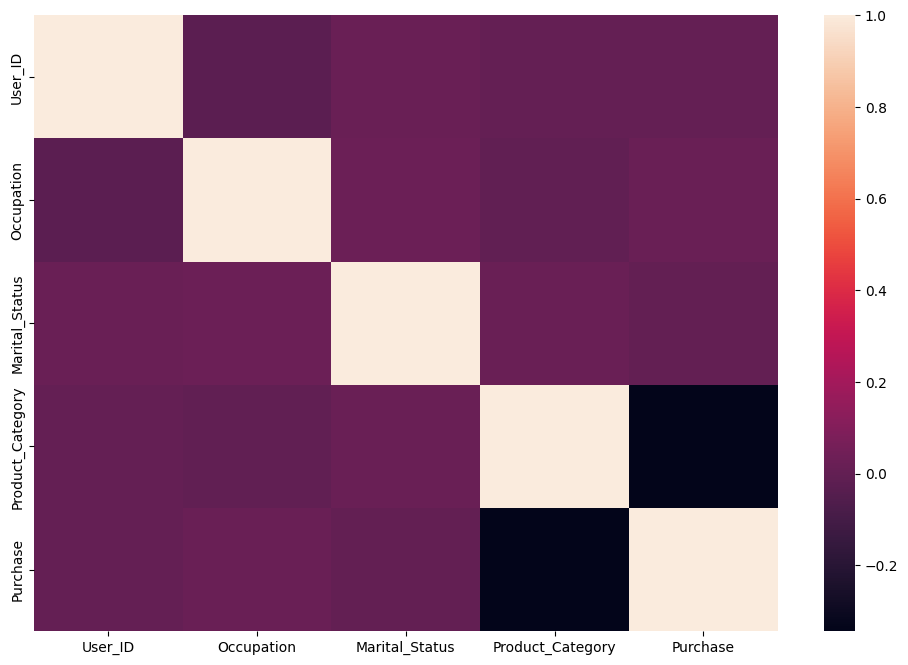

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True))

# Obervations:

## We could see that Product Category and Purchase is having negative correlation and rest other columns dont show any correlation

# Non Graphical Analysis:

## Percentage distribtuion of Spending for each category using pandas melt() function

In [ ]:
cat = ['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
round(df[cat].melt(var_name='Metric',value_name='Category').groupby(['Metric','Category'])['Category'].count()/len(df) * 100,2).reset_index(name='Total Percent')

,Metric,Category,Total Percent
0,Age,0-17,2.75
1,Age,18-25,18.12
2,Age,26-35,39.92
3,Age,36-45,20.00
4,Age,46-50,8.31
5,Age,51-55,7.00
6,Age,55+,3.91
7,City_Category,A,26.85
8,City_Category,B,42.03
9,City_Category,C,31.12


# Observations:

## We could see Age Group 26-35 dominating by contributing 40% of total Sales.
## 42 % of sales comes from City_category B
## 75% of Males and 25% of females contribute for Total Sales.
## On top Product Categories,Product Category 5 contributes 27 % of sales and product categry 1 contributes 25% of sales.
## People who stayed for 1 year contribute 35 % of total sales.

# Question: Are women spending more money per transaction than men? Why or Why not?

In [5]:
df.groupby('Gender')['Purchase'].mean()/(df.groupby('Gender')['Purchase'].mean()[0]+df.groupby('Gender')['Purchase'].mean()[1])

Gender
F    0.480658
M    0.519342
Name: Purchase, dtype: float64

## From the above mean calculation we could see that 52 % of Males result in average spendings where as Females contribute 48 %. So Men are spending more money per transation compared to females.

# Gender Comparison: Male vs Female Purchases

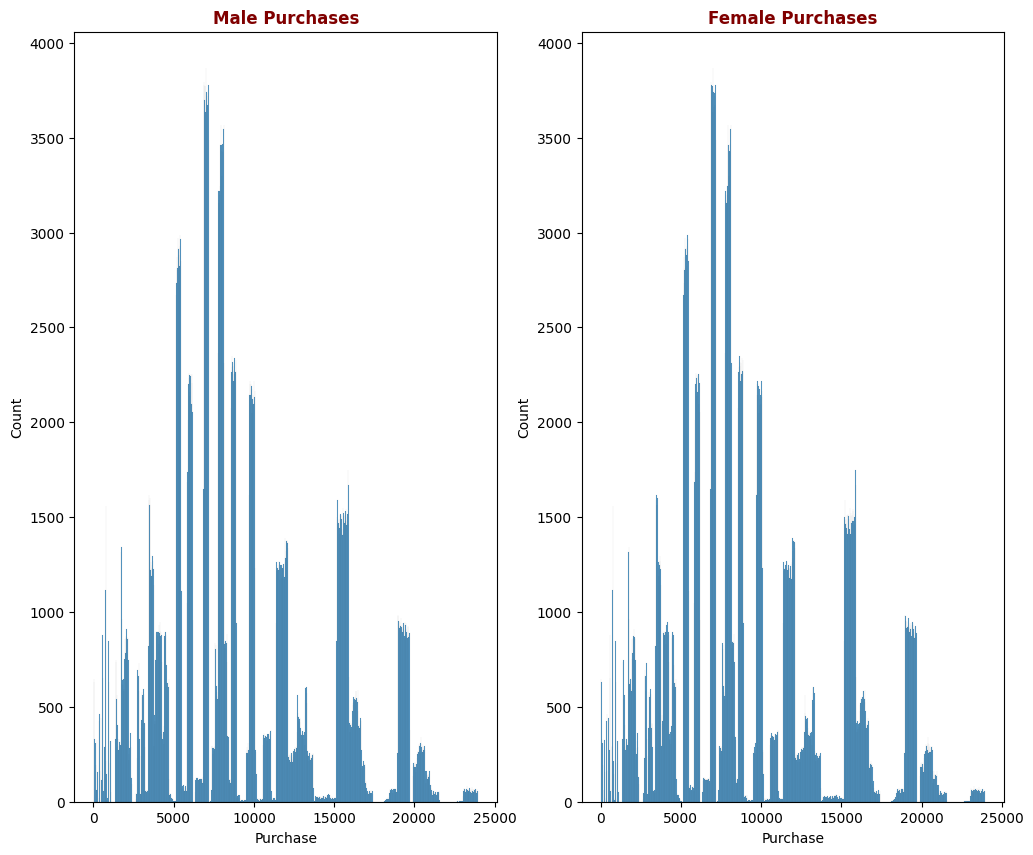

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
sns.histplot(data=df.loc[df['Gender']=='M'],x=df['Purchase'],bins=1000)
plt.title('Male Purchases',color='maroon',fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(data=df.loc[df['Gender']=='F'],x=df['Purchase'],bins=1000)
plt.title('Female Purchases',color='maroon',fontweight='bold')
plt.show()

# Observations:

## From the above graph, we could see there is no much difference in the purchasing behaviour of Male and Female and mean of the purchases are almost similar.

# Finding Confidence Interval (approx. Population Mean) of Gender distribution of purchases through Sample Mean Distributions of the given Data.

In [ ]:
df_male=df.loc[df['Gender']=='M']
Male_sample=[df_male['Purchase'].sample(100).mean() for i in range(15000)]

In [ ]:
df_female=df.loc[df['Gender']=='F']
Female_sample=[df_female['Purchase'].sample(100).mean() for i in range(15000)]

## Here we take 100 Samples each of Male and Female and find mean and repeat the step for 15000 times. Final data is appended to list containing sample mean data.

# Use of norm.interval function:
## Fetching 99 % Confidence Interval

In [ ]:
std=np.array(Male_sample).std()/math.sqrt(100)
Male_CI99 =norm.interval(0.99, loc=np.array(Male_sample).mean(), scale=std)
np.array(Female_sample).mean()
std=np.array(Female_sample).std()/math.sqrt(100)
Female_CI99 =norm.interval(0.99, loc=np.array(Female_sample).mean(), scale=std)

## Fetching 95 % Confidence Interval

In [ ]:
std=np.array(Male_sample).std()/math.sqrt(100)
Male_CI95 =norm.interval(0.95, loc=np.array(Male_sample).mean(), scale=std)
np.array(Female_sample).mean()
std=np.array(Female_sample).std()/math.sqrt(100)
Female_CI95 =norm.interval(0.95, loc=np.array(Female_sample).mean(), scale=std)

## Fetching 90 % Confidence Interval

In [ ]:
std=np.array(Male_sample).std()/math.sqrt(100)
Male_CI90 =norm.interval(0.90, loc=np.array(Male_sample).mean(), scale=std)
np.array(Female_sample).mean()
std=np.array(Female_sample).std()/math.sqrt(100)
Female_CI90 =norm.interval(0.90, loc=np.array(Female_sample).mean(), scale=std)

Male Vs Female Sample Mean distribution using histplot

<Axes: title={'center': 'Male_Female Sample Mean Distribution'}, ylabel='Count'>

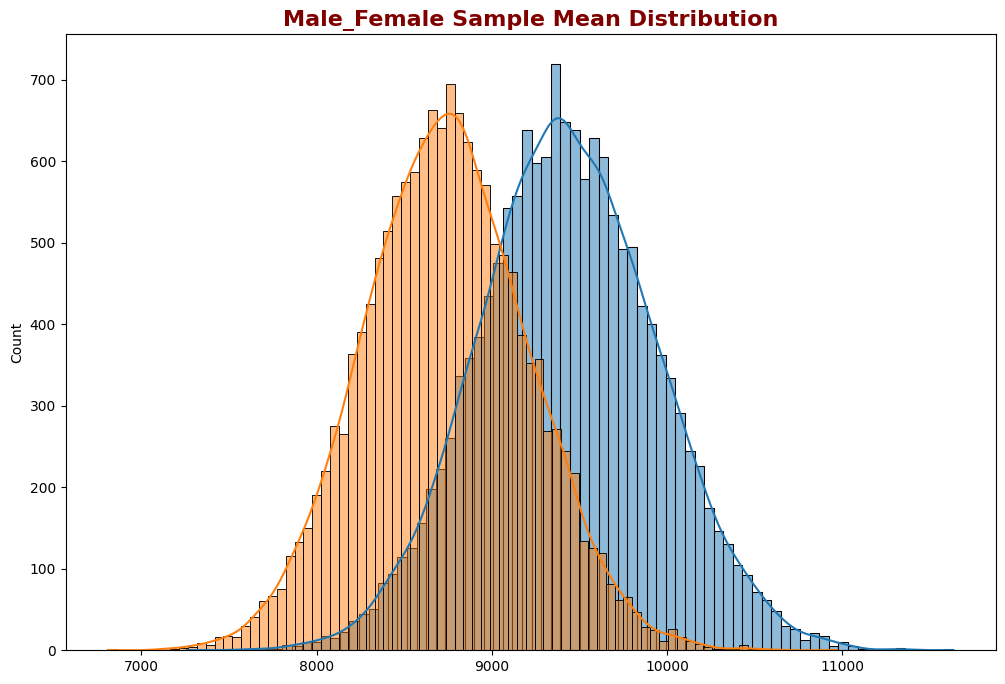

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Male_Female Sample Mean Distribution', color='maroon', fontsize=16, fontweight='bold')
sns.histplot(data=Male_sample, kde=True, label='Male Sample')
sns.histplot(data=Female_sample, kde=True, label='Female Sample')

# Visualising Confidence Intervals of Male vs Female Sample Mean Distribution for 99% CI

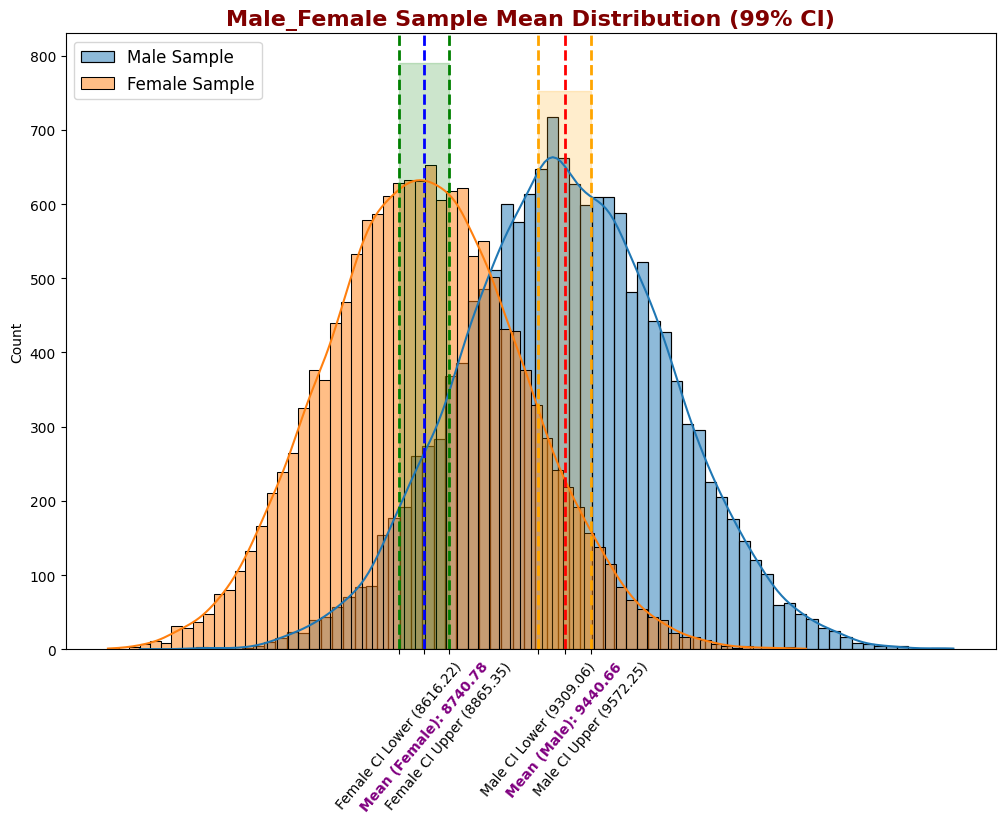

In [ ]:
plt.figure(figsize=(12, 8))

# First subplot
sns.histplot(data=Male_sample, kde=True, label='Male Sample')
sns.histplot(data=Female_sample, kde=True, label='Female Sample')
plt.title('Male_Female Sample Mean Distribution (99% CI)', color='maroon', fontsize=16, fontweight='bold')
plt.legend(loc='upper left', fontsize=12)

# Plot mean
male_mean = np.array(Male_sample).mean()
female_mean = np.array(Female_sample).mean()
plt.axvline(male_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Male): {male_mean:.2f}')
plt.axvline(female_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean (Female): {female_mean:.2f}')

# Plot 99% confidence interval
plt.axvline(Male_CI99[0], color='orange', linestyle='dashed', linewidth=2, label='99% CI Lower (Male)')
plt.axvline(Male_CI99[1], color='orange', linestyle='dashed', linewidth=2, label='99% CI Upper (Male)')
plt.axvline(Female_CI99[0], color='green', linestyle='dashed', linewidth=2, label='99% CI Lower (Female)')
plt.axvline(Female_CI99[1], color='green', linestyle='dashed', linewidth=2, label='99% CI Upper (Female)')

# Highlight the area within the 99% confidence interval
plt.fill_betweenx(y=[0, plt.ylim()[1]], x1=Male_CI99[0], x2=Male_CI99[1], color='orange', alpha=0.2)
plt.fill_betweenx(y=[0, plt.ylim()[1]], x1=Female_CI99[0], x2=Female_CI99[1], color='green', alpha=0.2)

# Set x-axis labels with confidence interval values and mean
plt.xticks(ticks=[Male_CI99[0], male_mean, Male_CI99[1], Female_CI99[0], female_mean, Female_CI99[1]],
           labels=['Male CI Lower ({:.2f})'.format(Male_CI99[0]),
                   f'Mean (Male): {male_mean:.2f}',
                   'Male CI Upper ({:.2f})'.format(Male_CI99[1]),
                   'Female CI Lower ({:.2f})'.format(Female_CI99[0]),
                   f'Mean (Female): {female_mean:.2f}',
                   'Female CI Upper ({:.2f})'.format(Female_CI99[1])], rotation=50)

# Change color and make mean labels bold
for label in plt.gca().get_xticklabels():
    if 'Mean' in label.get_text():
        label.set_color('purple')
        label.set_fontweight('bold')

plt.show()

# Visualising Confidence Intervals of Male vs Female Sample Mean Distribution for 95% CI

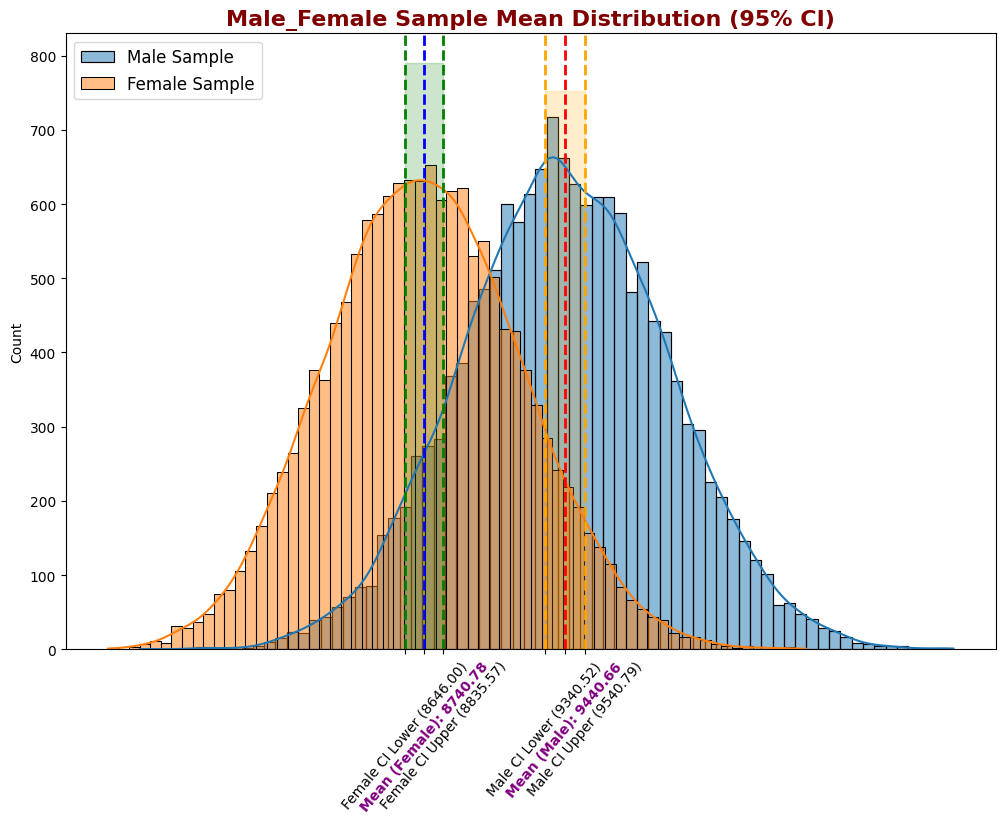

In [ ]:
plt.figure(figsize=(12, 8))

# Second subplot
sns.histplot(data=Male_sample, kde=True, label='Male Sample')
sns.histplot(data=Female_sample, kde=True, label='Female Sample')
plt.title('Male_Female Sample Mean Distribution (95% CI)', color='maroon', fontsize=16, fontweight='bold')
plt.legend(loc='upper left',fontsize=12)

# Plot mean
plt.axvline(male_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Male): {male_mean:.2f}')
plt.axvline(female_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean (Female): {female_mean:.2f}')

# Plot 95% confidence interval
plt.axvline(Male_CI95[0], color='orange', linestyle='dashed', linewidth=2, label='95% CI Lower (Male)')
plt.axvline(Male_CI95[1], color='orange', linestyle='dashed', linewidth=2, label='95% CI Upper (Male)')
plt.axvline(Female_CI95[0], color='green', linestyle='dashed', linewidth=2, label='95% CI Lower (Female)')
plt.axvline(Female_CI95[1], color='green', linestyle='dashed', linewidth=2, label='95% CI Upper (Female)')

# Highlight the area within the 95% confidence interval
plt.fill_betweenx(y=[0, plt.ylim()[1]], x1=Male_CI95[0], x2=Male_CI95[1], color='orange', alpha=0.2)
plt.fill_betweenx(y=[0, plt.ylim()[1]], x1=Female_CI95[0], x2=Female_CI95[1], color='green', alpha=0.2)

# Set x-axis labels with confidence interval values and mean
plt.xticks(ticks=[Male_CI95[0], male_mean, Male_CI95[1], Female_CI95[0], female_mean, Female_CI95[1]],
           labels=['Male CI Lower ({:.2f})'.format(Male_CI95[0]),
                   f'Mean (Male): {male_mean:.2f}',
                   'Male CI Upper ({:.2f})'.format(Male_CI95[1]),
                   'Female CI Lower ({:.2f})'.format(Female_CI95[0]),
                   f'Mean (Female): {female_mean:.2f}',
                   'Female CI Upper ({:.2f})'.format(Female_CI95[1])], rotation=50)

# Change color and make mean labels bold
for label in plt.gca().get_xticklabels():
    if 'Mean' in label.get_text():
        label.set_color('purple')
        label.set_fontweight('bold')

plt.show()

# Visualising Confidence Intervals of Male vs Female Sample Mean Distribution for 90% CI

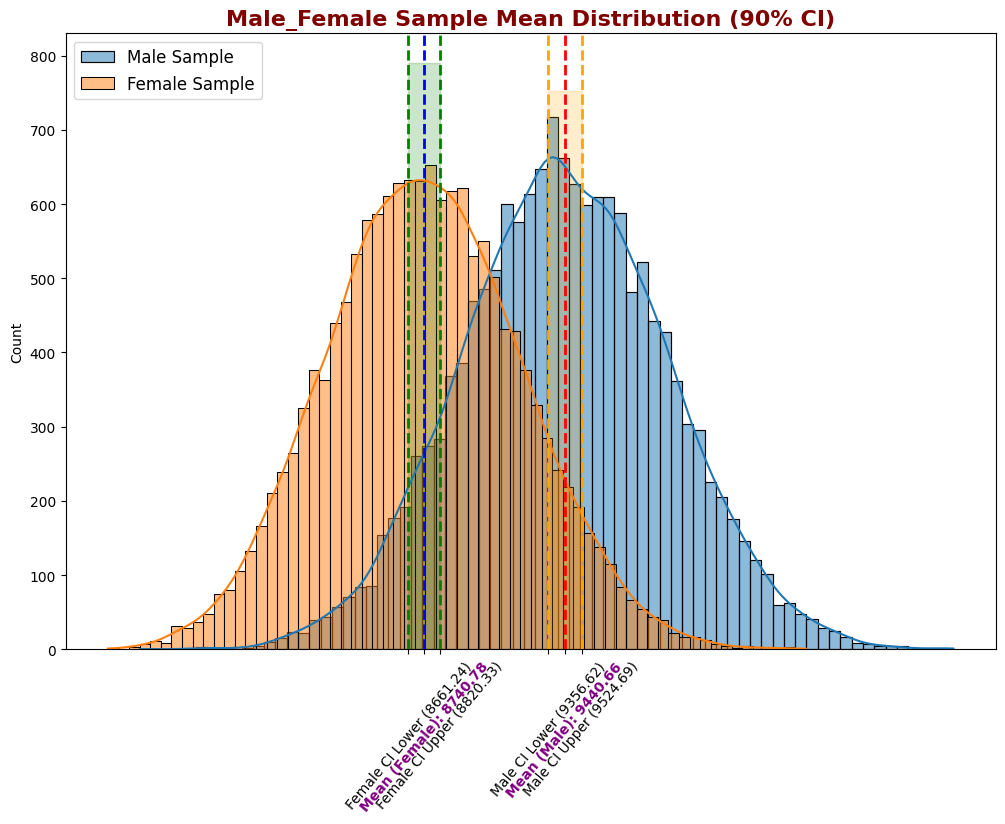

In [ ]:
plt.figure(figsize=(12, 8))
# Third subplot
sns.histplot(data=Male_sample, kde=True, label='Male Sample')
sns.histplot(data=Female_sample, kde=True, label='Female Sample')
plt.title('Male_Female Sample Mean Distribution (90% CI)', color='maroon', fontsize=16, fontweight='bold')
plt.legend(loc='upper left',fontsize=12)

# Plot mean
plt.axvline(male_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Male): {male_mean:.2f}')
plt.axvline(female_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean (Female): {female_mean:.2f}')

# Plot 90% confidence interval
plt.axvline(Male_CI90[0], color='orange', linestyle='dashed', linewidth=2, label='90% CI Lower (Male)')
plt.axvline(Male_CI90[1], color='orange', linestyle='dashed', linewidth=2, label='90% CI Upper (Male)')
plt.axvline(Female_CI90[0], color='green', linestyle='dashed', linewidth=2, label='90% CI Lower (Female)')
plt.axvline(Female_CI90[1], color='green', linestyle='dashed', linewidth=2, label='90% CI Upper (Female)')

# Highlight the area within the 90% confidence interval
plt.fill_betweenx(y=[0, plt.ylim()[1]], x1=Male_CI90[0], x2=Male_CI90[1], color='orange', alpha=0.2)
plt.fill_betweenx(y=[0, plt.ylim()[1]], x1=Female_CI90[0], x2=Female_CI90[1], color='green', alpha=0.2)

# Set x-axis labels with confidence interval values and mean
plt.xticks(ticks=[Male_CI90[0], male_mean, Male_CI90[1], Female_CI90[0], female_mean, Female_CI90[1]],labels=['Male CI Lower ({:.2f})'.format(Male_CI90[0]),
                               f'Mean (Male): {male_mean:.2f}',
                               'Male CI Upper ({:.2f})'.format(Male_CI90[1]),
                               'Female CI Lower ({:.2f})'.format(Female_CI90[0]),
                               f'Mean (Female): {female_mean:.2f}',
                               'Female CI Upper ({:.2f})'.format(Female_CI90[1])], rotation=50)
# Change color and make mean labels bold
for label in plt.gca().get_xticklabels():
    if 'Mean' in label.get_text():
        label.set_color('purple')
        label.set_fontweight('bold')

plt.show()

# Finding Confidence Interval (approx. Population Mean) of Marital_Status distribution of purchases through Sample Mean Distributions of the given Data.

In [ ]:
df_unmarried=df.loc[df['Marital_Status']==0]
Unmarried_sample=[df_unmarried['Purchase'].sample(100).mean() for i in range(10000)]

In [ ]:
df_married=df.loc[df['Marital_Status']==1]
Married_sample=[df_married['Purchase'].sample(100).mean() for i in range(10000)]

## Here we take 100 Samples each of Married and Unmarried customers and find mean and repeat the step for 10000 times. Final data is appended to list containing sample mean data.

# Visualising Confidence Intervals of Married vs Unmarried Sample Mean Distribution for 99% CI

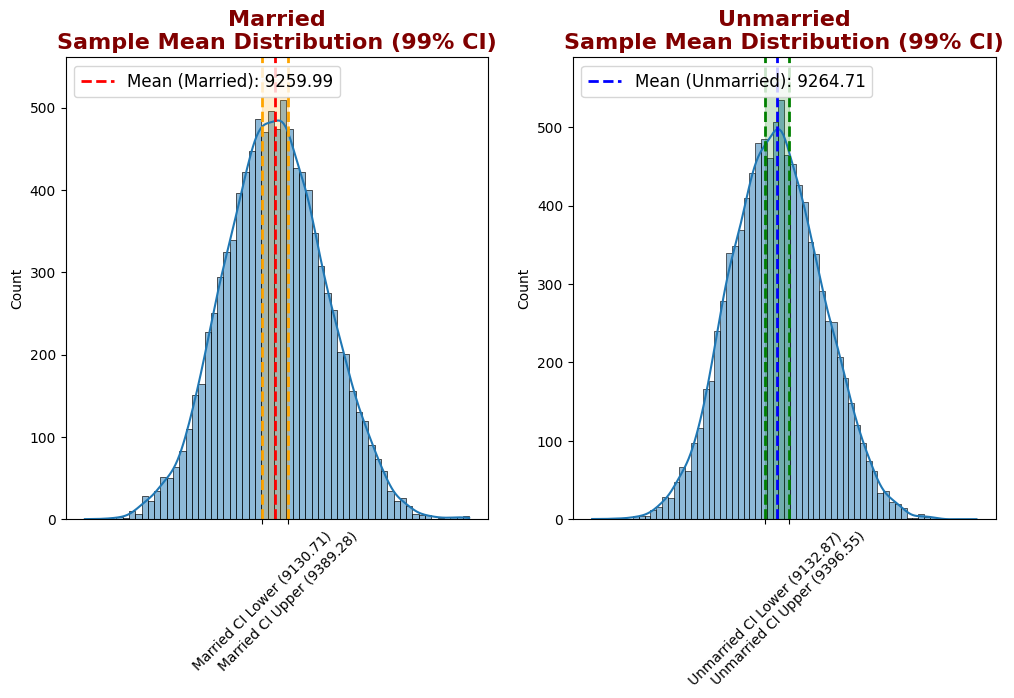

In [ ]:
# Calculate confidence intervals for married and unmarried samples
std_married = np.array(Married_sample).std() / math.sqrt(100)
married_mean = np.array(Married_sample).mean()
married_CI99 = norm.interval(0.99, loc=married_mean, scale=std_married)

std_unmarried = np.array(Unmarried_sample).std() / math.sqrt(100)
unmarried_mean = np.array(Unmarried_sample).mean()
unmarried_CI99 = norm.interval(0.99, loc=unmarried_mean, scale=std_unmarried)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Married sample
sns.histplot(data=Married_sample, kde=True, ax=ax[0])
ax[0].axvline(married_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Married): {married_mean:.2f}')
ax[0].axvline(married_CI99[0], color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(married_CI99[1], color='orange', linestyle='dashed', linewidth=2)
ax[0].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=married_CI99[0], x2=married_CI99[1], color='orange', alpha=0.2)
ax[0].set_title('Married\nSample Mean Distribution (99% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[0].legend(loc='upper left', fontsize=12)
ax[0].set_xticks([married_CI99[0],married_CI99[1]])
ax[0].set_xticklabels([f'Married CI Lower ({married_CI99[0]:.2f})',
                       f'Married CI Upper ({married_CI99[1]:.2f})'], rotation=45)

# Plot for Unmarried sample
sns.histplot(data=Unmarried_sample, kde=True, ax=ax[1])
ax[1].axvline(unmarried_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean (Unmarried): {unmarried_mean:.2f}')
ax[1].axvline(unmarried_CI99[0], color='green', linestyle='dashed', linewidth=2)
ax[1].axvline(unmarried_CI99[1], color='green', linestyle='dashed', linewidth=2)
ax[1].fill_betweenx(y=[0, ax[1].get_ylim()[1]], x1=unmarried_CI99[0], x2=unmarried_CI99[1], color='green', alpha=0.2)
ax[1].set_title('Unmarried\nSample Mean Distribution (99% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[1].legend(loc='upper left', fontsize=12)
ax[1].set_xticks([unmarried_CI99[0], unmarried_CI99[1]])
ax[1].set_xticklabels([f'Unmarried CI Lower ({unmarried_CI99[0]:.2f})',
                       f'Unmarried CI Upper ({unmarried_CI99[1]:.2f})'], rotation=45)


plt.show()


# Visualising Confidence Intervals of Married vs Unmarried Sample Mean Distribution for 95% CI

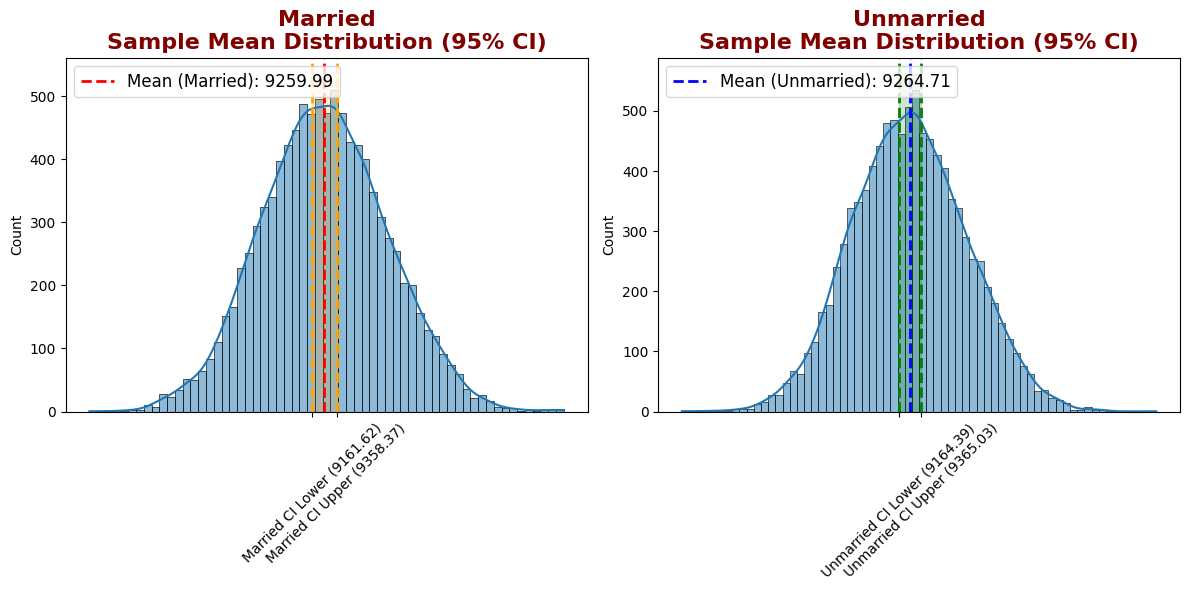

In [ ]:
# Calculate confidence intervals for married and unmarried samples (95%)
married_CI95 = norm.interval(0.95, loc=married_mean, scale=std_married)
unmarried_CI95 = norm.interval(0.95, loc=unmarried_mean, scale=std_unmarried)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Married sample
sns.histplot(data=Married_sample, kde=True, ax=ax[0])
ax[0].axvline(married_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Married): {married_mean:.2f}')
ax[0].axvline(married_CI95[0], color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(married_CI95[1], color='orange', linestyle='dashed', linewidth=2)
ax[0].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=married_CI95[0], x2=married_CI95[1], color='orange', alpha=0.2)
ax[0].set_title('Married\nSample Mean Distribution (95% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[0].legend(loc='upper left', fontsize=12)
ax[0].set_xticks([married_CI95[0], married_CI95[1]])
ax[0].set_xticklabels([f'Married CI Lower ({married_CI95[0]:.2f})',
                       f'Married CI Upper ({married_CI95[1]:.2f})'], rotation=45)

# Plot for Unmarried sample
sns.histplot(data=Unmarried_sample, kde=True,ax=ax[1])
ax[1].axvline(unmarried_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean (Unmarried): {unmarried_mean:.2f}')
ax[1].axvline(unmarried_CI95[0], color='green', linestyle='dashed', linewidth=2)
ax[1].axvline(unmarried_CI95[1], color='green', linestyle='dashed', linewidth=2)
ax[1].fill_betweenx(y=[0, ax[1].get_ylim()[1]], x1=unmarried_CI95[0], x2=unmarried_CI95[1], color='green', alpha=0.2)
ax[1].set_title('Unmarried\nSample Mean Distribution (95% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[1].legend(loc='upper left', fontsize=12)
ax[1].set_xticks([unmarried_CI95[0],unmarried_CI95[1]])
ax[1].set_xticklabels([f'Unmarried CI Lower ({unmarried_CI95[0]:.2f})'   ,
                       f'Unmarried CI Upper ({unmarried_CI95[1]:.2f})'], rotation=45)

plt.tight_layout()
plt.show()


# Visualising Confidence Intervals of Married vs Unmarried Sample Mean Distribution for 90% CI

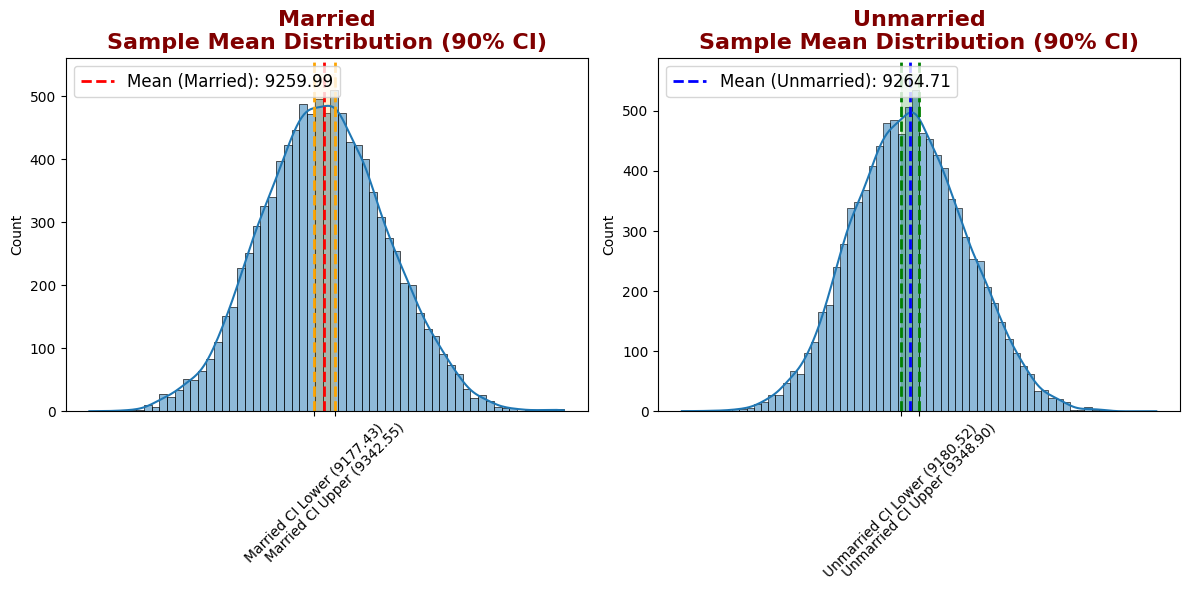

In [ ]:
# Calculate confidence intervals for married and unmarried samples (90%)
married_CI90 = norm.interval(0.90, loc=married_mean, scale=std_married)
unmarried_CI90 = norm.interval(0.90, loc=unmarried_mean, scale=std_unmarried)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Married sample
sns.histplot(data=Married_sample, kde=True, ax=ax[0])
ax[0].axvline(married_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Married): {married_mean:.2f}')
ax[0].axvline(married_CI90[0], color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(married_CI90[1], color='orange', linestyle='dashed', linewidth=2)
ax[0].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=married_CI90[0], x2=married_CI90[1], color='orange', alpha=0.2)
ax[0].set_title('Married\nSample Mean Distribution (90% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[0].legend(loc='upper left', fontsize=12)
ax[0].set_xticks([married_CI90[0], married_CI90[1]])
ax[0].set_xticklabels([f'Married CI Lower ({married_CI90[0]:.2f})',
                       f'Married CI Upper ({married_CI90[1]:.2f})'], rotation=45)

# Plot for Unmarried sample
sns.histplot(data=Unmarried_sample, kde=True, ax=ax[1])
ax[1].axvline(unmarried_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean (Unmarried): {unmarried_mean:.2f}')
ax[1].axvline(unmarried_CI90[0], color='green', linestyle='dashed', linewidth=2)
ax[1].axvline(unmarried_CI90[1], color='green', linestyle='dashed', linewidth=2)
ax[1].fill_betweenx(y=[0, ax[1].get_ylim()[1]], x1=unmarried_CI90[0], x2=unmarried_CI90[1], color='green', alpha=0.2)
ax[1].set_title('Unmarried\nSample Mean Distribution (90% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[1].legend(loc='upper left', fontsize=12)
ax[1].set_xticks([unmarried_CI90[0],unmarried_CI90[1]])
ax[1].set_xticklabels([f'Unmarried CI Lower ({unmarried_CI90[0]:.2f})',
                       f'Unmarried CI Upper ({unmarried_CI90[1]:.2f})'], rotation=45)

plt.tight_layout()
plt.show()


# Finding Confidence Interval (approx. Population Mean) of Age distribution of purchases through Sample Mean Distributions of the given Data.

In [ ]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
df_age0_17=df.loc[df['Age']=='0-17']
Age0_17_sample=[df_age0_17['Purchase'].sample(100).mean() for i in range(10000)]

In [ ]:
df_age18_25=df.loc[df['Age']=='18-25']
Age18_25_sample=[df_age18_25['Purchase'].sample(100).mean() for i in range(10000)]

In [ ]:
df_age26_35=df.loc[df['Age']=='26-35']
Age26_35_sample=[df_age26_35['Purchase'].sample(100).mean() for i in range(10000)]

In [ ]:
df_age36_45=df.loc[df['Age']=='36-45']
Age36_45_sample=[df_age36_45['Purchase'].sample(100).mean() for i in range(10000)]

In [ ]:
df_age46_50=df.loc[df['Age']=='46-50']
Age46_50_sample=[df_age46_50['Purchase'].sample(100).mean() for i in range(10000)]

In [ ]:
df_age51_55=df.loc[df['Age']=='51-55']
Age51_55_sample=[df_age51_55['Purchase'].sample(100).mean() for i in range(10000)]

In [ ]:
df_age56=df.loc[df['Age']=='55+']
Age56_sample=[df_age56['Purchase'].sample(100).mean() for i in range(10000)]

## Here we take 100 Samples each of all different categories of Ages and find mean and repeat the step for 10000 times. Final data is appended to list containing sample mean data.

# Visualising Confidence Intervals of Age Group 0 -17 from Sample Mean Distribution for 99% ,95% and 90% CI levels

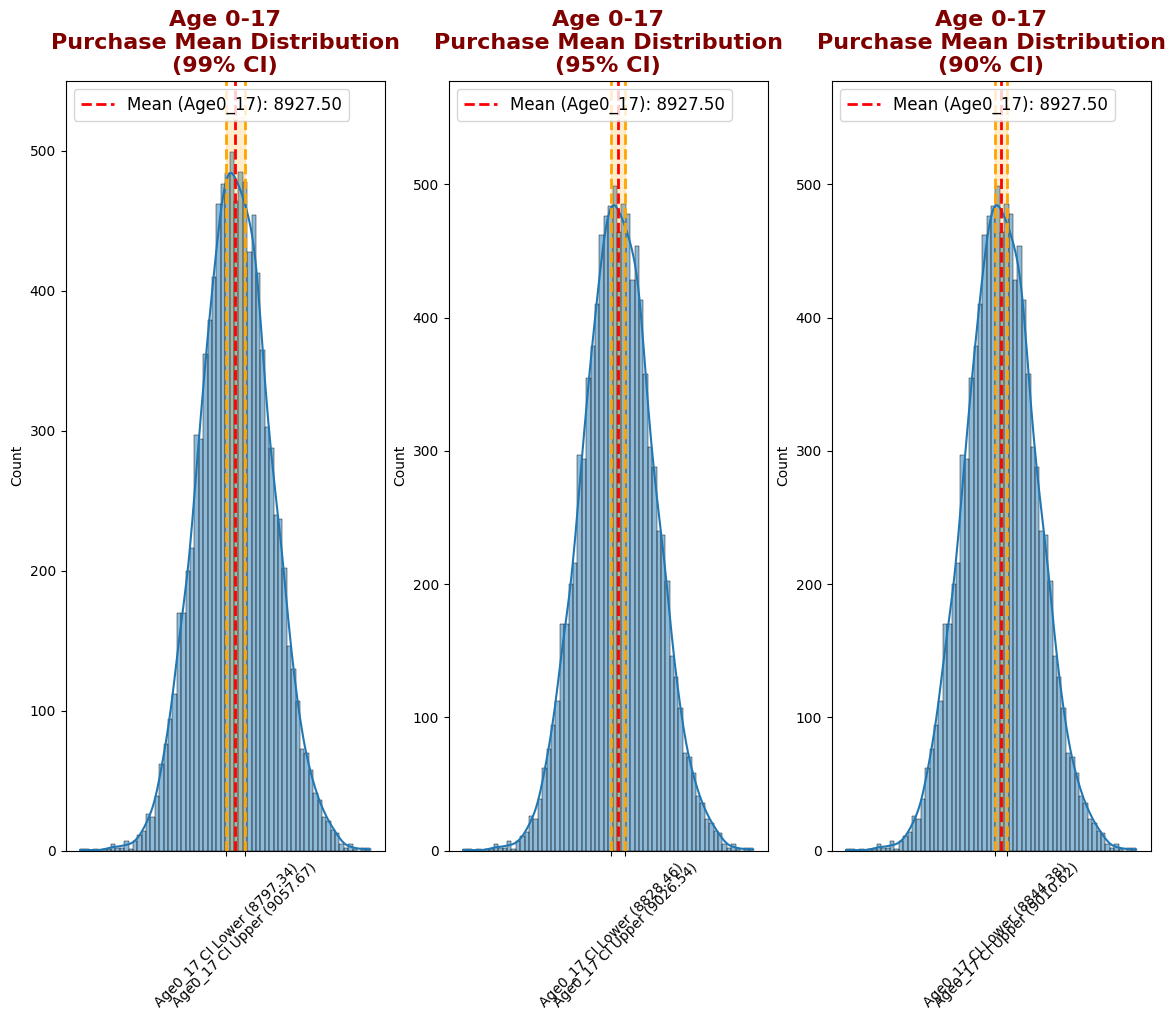

In [ ]:
# Calculate confidence intervals for Age 0-17 samples
std_age0_17 = np.array(Age0_17_sample).std() / math.sqrt(100)
age0_17_mean = np.array(Age0_17_sample).mean()
age0_17_CI99 = norm.interval(0.99, loc=age0_17_mean, scale=std_age0_17)
age0_17_CI95 = norm.interval(0.95, loc=age0_17_mean, scale=std_age0_17)
age0_17_CI90 = norm.interval(0.90, loc=age0_17_mean, scale=std_age0_17)

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(14, 10))

# Plot for 99% CI
sns.histplot(data=Age0_17_sample, kde=True, ax=ax[0])
ax[0].axvline(age0_17_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age0_17): {age0_17_mean:.2f}')
ax[0].axvline(age0_17_CI99[0], color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(age0_17_CI99[1], color='orange', linestyle='dashed', linewidth=2)
ax[0].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age0_17_CI99[0], x2=age0_17_CI99[1], color='orange', alpha=0.2)
ax[0].set_title('Age 0-17\nPurchase Mean Distribution\n(99% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[0].legend(loc='upper left', fontsize=12)
ax[0].set_xticks([age0_17_CI99[0],age0_17_CI99[1]])
ax[0].set_xticklabels([f'Age0_17 CI Lower ({age0_17_CI99[0]:.2f})',
                       f'Age0_17 CI Upper ({age0_17_CI99[1]:.2f})'], rotation=45)

# Plot for 95% CI
sns.histplot(data=Age0_17_sample, kde=True, ax=ax[1])
ax[1].axvline(age0_17_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age0_17): {age0_17_mean:.2f}')
ax[1].axvline(age0_17_CI95[0], color='orange', linestyle='dashed', linewidth=2)
ax[1].axvline(age0_17_CI95[1], color='orange', linestyle='dashed', linewidth=2)
ax[1].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age0_17_CI95[0], x2=age0_17_CI95[1], color='orange', alpha=0.2)
ax[1].set_title('Age 0-17\nPurchase Mean Distribution\n(95% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[1].legend(loc='upper left', fontsize=12)
ax[1].set_xticks([age0_17_CI95[0],age0_17_CI95[1]])
ax[1].set_xticklabels([f'Age0_17 CI Lower ({age0_17_CI95[0]:.2f})',
                       f'Age0_17 CI Upper ({age0_17_CI95[1]:.2f})'], rotation=45)

# Plot for 90% CI
sns.histplot(data=Age0_17_sample, kde=True, ax=ax[2])
ax[2].axvline(age0_17_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age0_17): {age0_17_mean:.2f}')
ax[2].axvline(age0_17_CI90[0], color='orange', linestyle='dashed', linewidth=2)
ax[2].axvline(age0_17_CI90[1], color='orange', linestyle='dashed', linewidth=2)
ax[2].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age0_17_CI90[0], x2=age0_17_CI90[1], color='orange', alpha=0.2)
ax[2].set_title('Age 0-17\nPurchase Mean Distribution\n(90% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[2].legend(loc='upper left', fontsize=12)
ax[2].set_xticks([age0_17_CI90[0],age0_17_CI90[1]])
ax[2].set_xticklabels([f'Age0_17 CI Lower ({age0_17_CI90[0]:.2f})',
                       f'Age0_17 CI Upper ({age0_17_CI90[1]:.2f})'], rotation=45)


plt.show()

# Visualising Confidence Intervals of Age Group 18_25 from Sample Mean Distribution for 99% ,95% and 90% CI levels

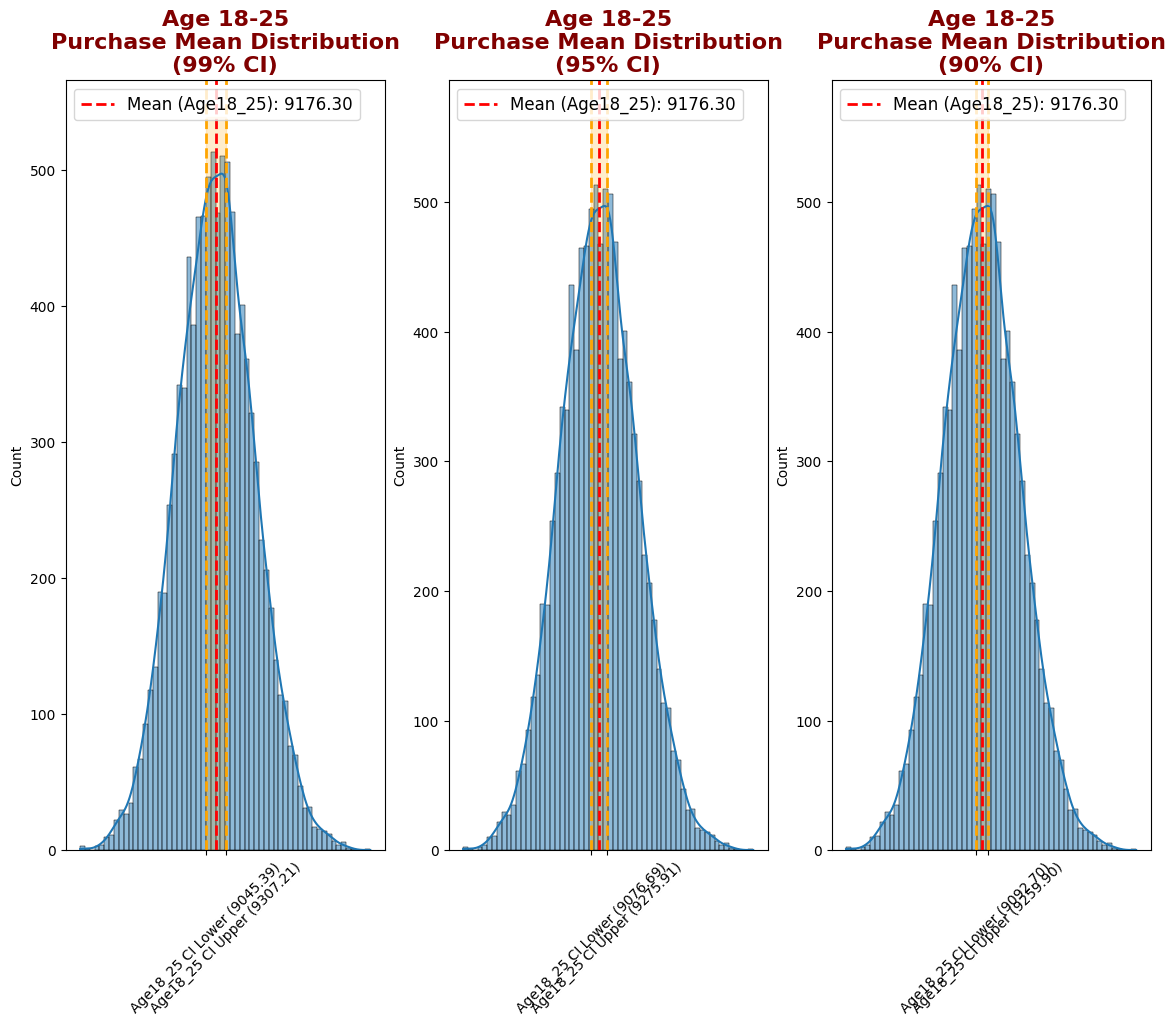

In [ ]:
# Calculate confidence intervals for Age 18-25 samples
std_age18_25 = np.array(Age18_25_sample).std() / math.sqrt(100)
age18_25_mean = np.array(Age18_25_sample).mean()
age18_25_CI99 = norm.interval(0.99, loc=age18_25_mean, scale=std_age18_25)
age18_25_CI95 = norm.interval(0.95, loc=age18_25_mean, scale=std_age18_25)
age18_25_CI90 = norm.interval(0.90, loc=age18_25_mean, scale=std_age18_25)

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(14, 10))

# Plot for 99% CI
sns.histplot(data=Age18_25_sample, kde=True, ax=ax[0])
ax[0].axvline(age18_25_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age18_25): {age18_25_mean:.2f}')
ax[0].axvline(age18_25_CI99[0], color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(age18_25_CI99[1], color='orange', linestyle='dashed', linewidth=2)
ax[0].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age18_25_CI99[0], x2=age18_25_CI99[1], color='orange', alpha=0.2)
ax[0].set_title('Age 18-25\nPurchase Mean Distribution\n(99% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[0].legend(loc='upper left', fontsize=12)
ax[0].set_xticks([age18_25_CI99[0],age18_25_CI99[1]])
ax[0].set_xticklabels([f'Age18_25 CI Lower ({age18_25_CI99[0]:.2f})',
                       f'Age18_25 CI Upper ({age18_25_CI99[1]:.2f})'], rotation=45)

# Plot for 95% CI
sns.histplot(data=Age18_25_sample, kde=True, ax=ax[1])
ax[1].axvline(age18_25_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age18_25): {age18_25_mean:.2f}')
ax[1].axvline(age18_25_CI95[0], color='orange', linestyle='dashed', linewidth=2)
ax[1].axvline(age18_25_CI95[1], color='orange', linestyle='dashed', linewidth=2)
ax[1].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age18_25_CI95[0], x2=age18_25_CI95[1], color='orange', alpha=0.2)
ax[1].set_title('Age 18-25\nPurchase Mean Distribution\n(95% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[1].legend(loc='upper left', fontsize=12)
ax[1].set_xticks([age18_25_CI95[0],age18_25_CI95[1]])
ax[1].set_xticklabels([f'Age18_25 CI Lower ({age18_25_CI95[0]:.2f})',
                       f'Age18_25 CI Upper ({age18_25_CI95[1]:.2f})'], rotation=45)

# Plot for 90% CI
sns.histplot(data=Age18_25_sample, kde=True, ax=ax[2])
ax[2].axvline(age18_25_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age18_25): {age18_25_mean:.2f}')
ax[2].axvline(age18_25_CI90[0], color='orange', linestyle='dashed', linewidth=2)
ax[2].axvline(age18_25_CI90[1], color='orange', linestyle='dashed', linewidth=2)
ax[2].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age18_25_CI90[0], x2=age18_25_CI90[1], color='orange', alpha=0.2)
ax[2].set_title('Age 18-25\nPurchase Mean Distribution\n(90% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[2].legend(loc='upper left', fontsize=12)
ax[2].set_xticks([age18_25_CI90[0],age18_25_CI90[1]])
ax[2].set_xticklabels([f'Age18_25 CI Lower ({age18_25_CI90[0]:.2f})',
                       f'Age18_25 CI Upper ({age18_25_CI90[1]:.2f})'], rotation=45)


plt.show()

# Visualising Confidence Intervals of Age Group 26-35 from Sample Mean Distribution for 99% ,95% and 90% CI levels

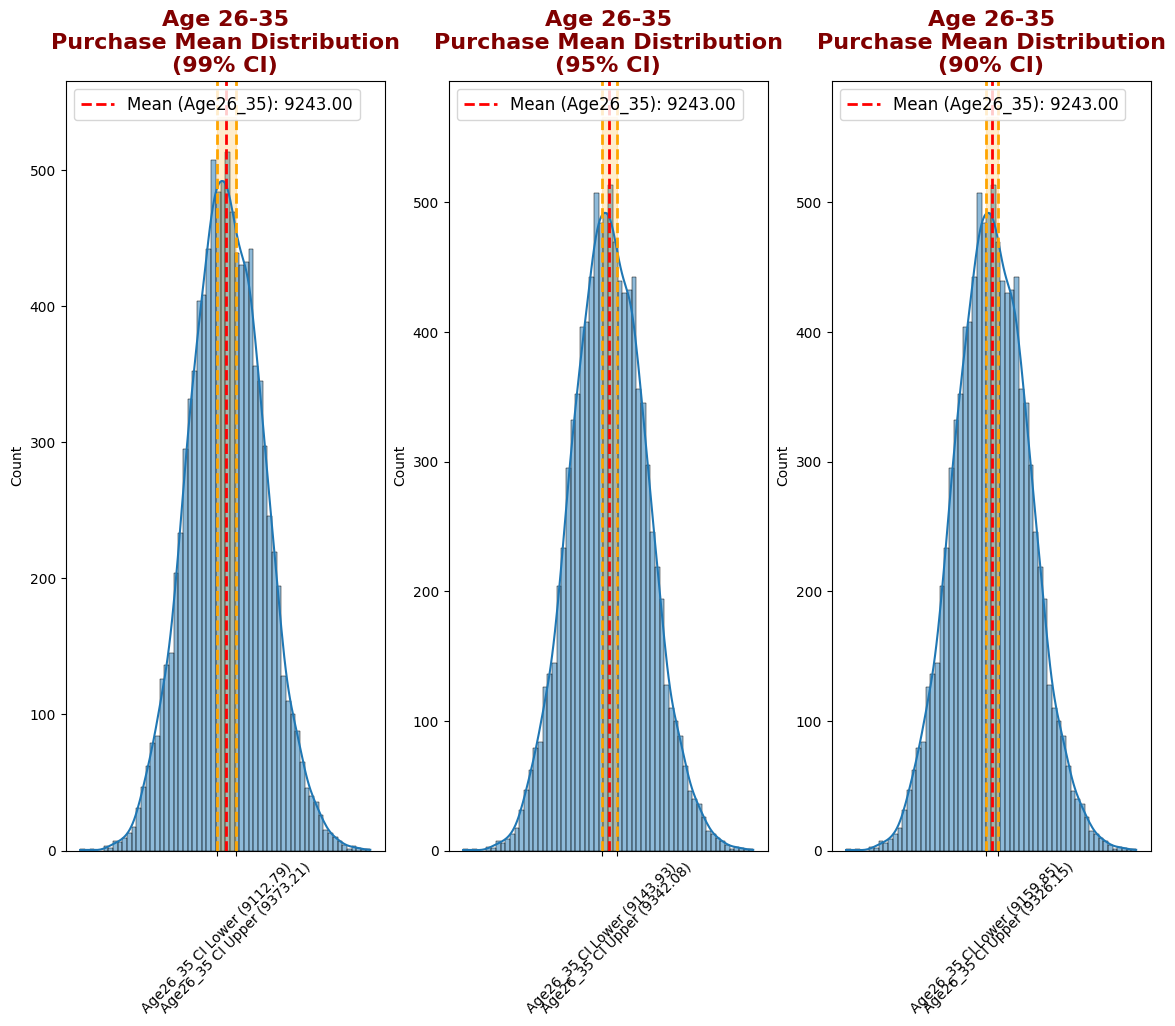

In [ ]:
# Calculate confidence intervals for Age 26-35 samples
std_age26_35 = np.array(Age26_35_sample).std() / math.sqrt(100)
age26_35_mean = np.array(Age26_35_sample).mean()
age26_35_CI99 = norm.interval(0.99, loc=age26_35_mean, scale=std_age26_35)
age26_35_CI95 = norm.interval(0.95, loc=age26_35_mean, scale=std_age26_35)
age26_35_CI90 = norm.interval(0.90, loc=age26_35_mean, scale=std_age26_35)

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(14, 10))

# Plot for 99% CI
sns.histplot(data=Age26_35_sample, kde=True, ax=ax[0])
ax[0].axvline(age26_35_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age26_35): {age26_35_mean:.2f}')
ax[0].axvline(age26_35_CI99[0], color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(age26_35_CI99[1], color='orange', linestyle='dashed', linewidth=2)
ax[0].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age26_35_CI99[0], x2=age26_35_CI99[1], color='orange', alpha=0.2)
ax[0].set_title('Age 26-35\nPurchase Mean Distribution\n(99% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[0].legend(loc='upper left', fontsize=12)
ax[0].set_xticks([age26_35_CI99[0],age26_35_CI99[1]])
ax[0].set_xticklabels([f'Age26_35 CI Lower ({age26_35_CI99[0]:.2f})',
                       f'Age26_35 CI Upper ({age26_35_CI99[1]:.2f})'], rotation=45)

# Plot for 95% CI
sns.histplot(data=Age26_35_sample, kde=True, ax=ax[1])
ax[1].axvline(age26_35_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age26_35): {age26_35_mean:.2f}')
ax[1].axvline(age26_35_CI95[0], color='orange', linestyle='dashed', linewidth=2)
ax[1].axvline(age26_35_CI95[1], color='orange', linestyle='dashed', linewidth=2)
ax[1].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age26_35_CI95[0], x2=age26_35_CI95[1], color='orange', alpha=0.2)
ax[1].set_title('Age 26-35\nPurchase Mean Distribution\n(95% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[1].legend(loc='upper left', fontsize=12)
ax[1].set_xticks([age26_35_CI95[0],age26_35_CI95[1]])
ax[1].set_xticklabels([f'Age26_35 CI Lower ({age26_35_CI95[0]:.2f})',
                       f'Age26_35 CI Upper ({age26_35_CI95[1]:.2f})'], rotation=45)

# Plot for 90% CI
sns.histplot(data=Age26_35_sample, kde=True, ax=ax[2])
ax[2].axvline(age26_35_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age26_35): {age26_35_mean:.2f}')
ax[2].axvline(age26_35_CI90[0], color='orange', linestyle='dashed', linewidth=2)
ax[2].axvline(age26_35_CI90[1], color='orange', linestyle='dashed', linewidth=2)
ax[2].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age26_35_CI90[0], x2=age26_35_CI90[1], color='orange', alpha=0.2)
ax[2].set_title('Age 26-35\nPurchase Mean Distribution\n(90% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[2].legend(loc='upper left', fontsize=12)
ax[2].set_xticks([age26_35_CI90[0],age26_35_CI90[1]])
ax[2].set_xticklabels([f'Age26_35 CI Lower ({age26_35_CI90[0]:.2f})',
                       f'Age26_35 CI Upper ({age26_35_CI90[1]:.2f})'], rotation=45)


plt.show()

# Visualising Confidence Intervals of Age Group 36-45 from Sample Mean Distribution for 99% ,95% and 90% CI levels

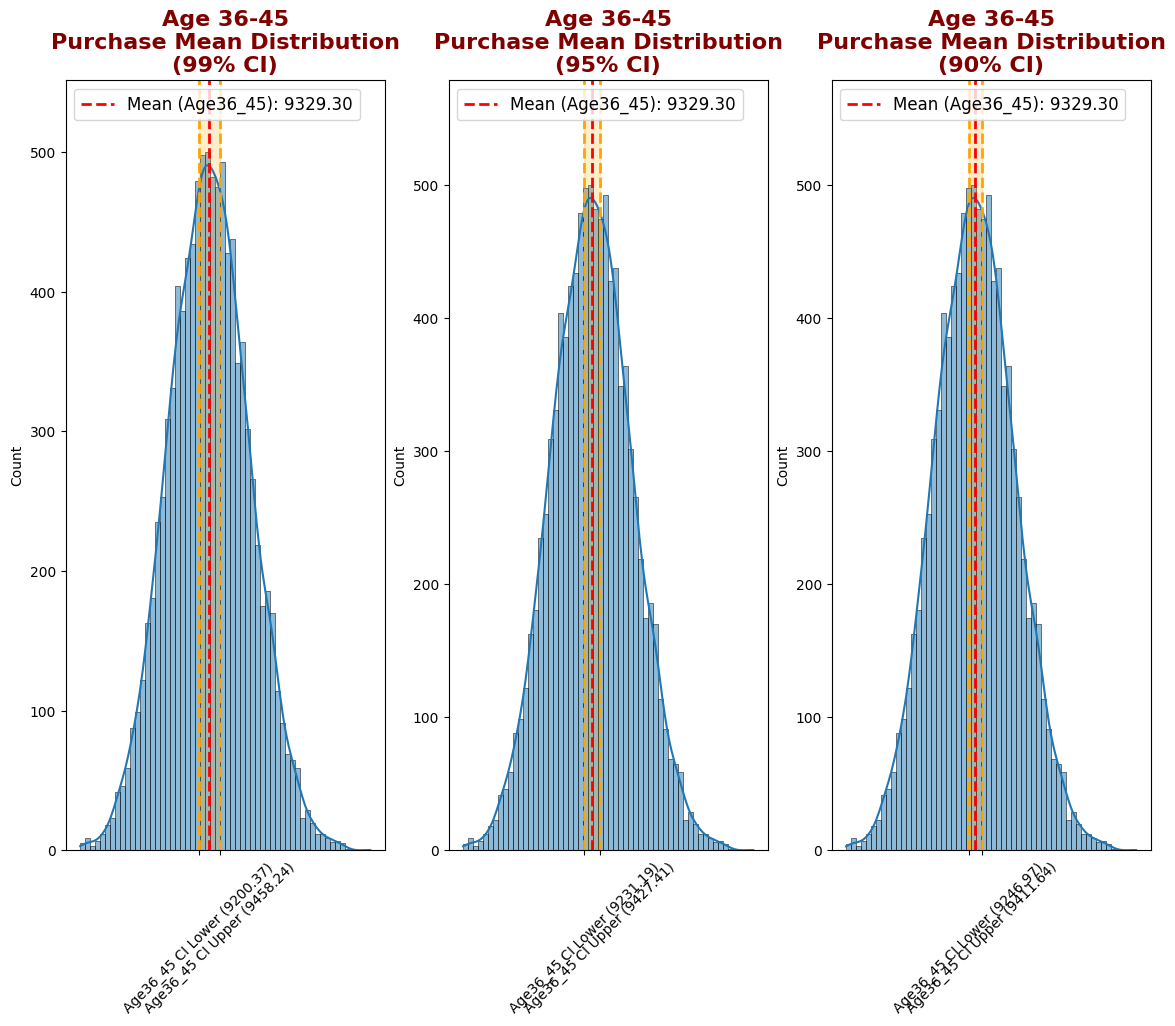

In [ ]:
# Calculate confidence intervals for Age 36-45 samples
std_age36_45 = np.array(Age36_45_sample).std() / math.sqrt(100)
age36_45_mean = np.array(Age36_45_sample).mean()
age36_45_CI99 = norm.interval(0.99, loc=age36_45_mean, scale=std_age36_45)
age36_45_CI95 = norm.interval(0.95, loc=age36_45_mean, scale=std_age36_45)
age36_45_CI90 = norm.interval(0.90, loc=age36_45_mean, scale=std_age36_45)

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(14, 10))

# Plot for 99% CI
sns.histplot(data=Age36_45_sample, kde=True, ax=ax[0])
ax[0].axvline(age36_45_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age36_45): {age36_45_mean:.2f}')
ax[0].axvline(age36_45_CI99[0], color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(age36_45_CI99[1], color='orange', linestyle='dashed', linewidth=2)
ax[0].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age36_45_CI99[0], x2=age36_45_CI99[1], color='orange', alpha=0.2)
ax[0].set_title('Age 36-45\nPurchase Mean Distribution\n(99% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[0].legend(loc='upper left', fontsize=12)
ax[0].set_xticks([age36_45_CI99[0],age36_45_CI99[1]])
ax[0].set_xticklabels([f'Age36_45 CI Lower ({age36_45_CI99[0]:.2f})',
                       f'Age36_45 CI Upper ({age36_45_CI99[1]:.2f})'], rotation=45)

# Plot for 95% CI
sns.histplot(data=Age36_45_sample, kde=True, ax=ax[1])
ax[1].axvline(age36_45_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age36_45): {age36_45_mean:.2f}')
ax[1].axvline(age36_45_CI95[0], color='orange', linestyle='dashed', linewidth=2)
ax[1].axvline(age36_45_CI95[1], color='orange', linestyle='dashed', linewidth=2)
ax[1].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age36_45_CI95[0], x2=age36_45_CI95[1], color='orange', alpha=0.2)
ax[1].set_title('Age 36-45\nPurchase Mean Distribution\n(95% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[1].legend(loc='upper left', fontsize=12)
ax[1].set_xticks([age36_45_CI95[0],age36_45_CI95[1]])
ax[1].set_xticklabels([f'Age36_45 CI Lower ({age36_45_CI95[0]:.2f})',
                       f'Age36_45 CI Upper ({age36_45_CI95[1]:.2f})'], rotation=45)

# Plot for 90% CI
sns.histplot(data=Age36_45_sample, kde=True, ax=ax[2])
ax[2].axvline(age36_45_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age36_45): {age36_45_mean:.2f}')
ax[2].axvline(age36_45_CI90[0], color='orange', linestyle='dashed', linewidth=2)
ax[2].axvline(age36_45_CI90[1], color='orange', linestyle='dashed', linewidth=2)
ax[2].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age36_45_CI90[0], x2=age36_45_CI90[1], color='orange', alpha=0.2)
ax[2].set_title('Age 36-45\nPurchase Mean Distribution\n(90% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[2].legend(loc='upper left', fontsize=12)
ax[2].set_xticks([age36_45_CI90[0],age36_45_CI90[1]])
ax[2].set_xticklabels([f'Age36_45 CI Lower ({age36_45_CI90[0]:.2f})',
                       f'Age36_45 CI Upper ({age36_45_CI90[1]:.2f})'], rotation=45)


plt.show()

# Visualising Confidence Intervals of Age Group 46-50 from Sample Mean Distribution for 99% ,95% and 90% CI levels

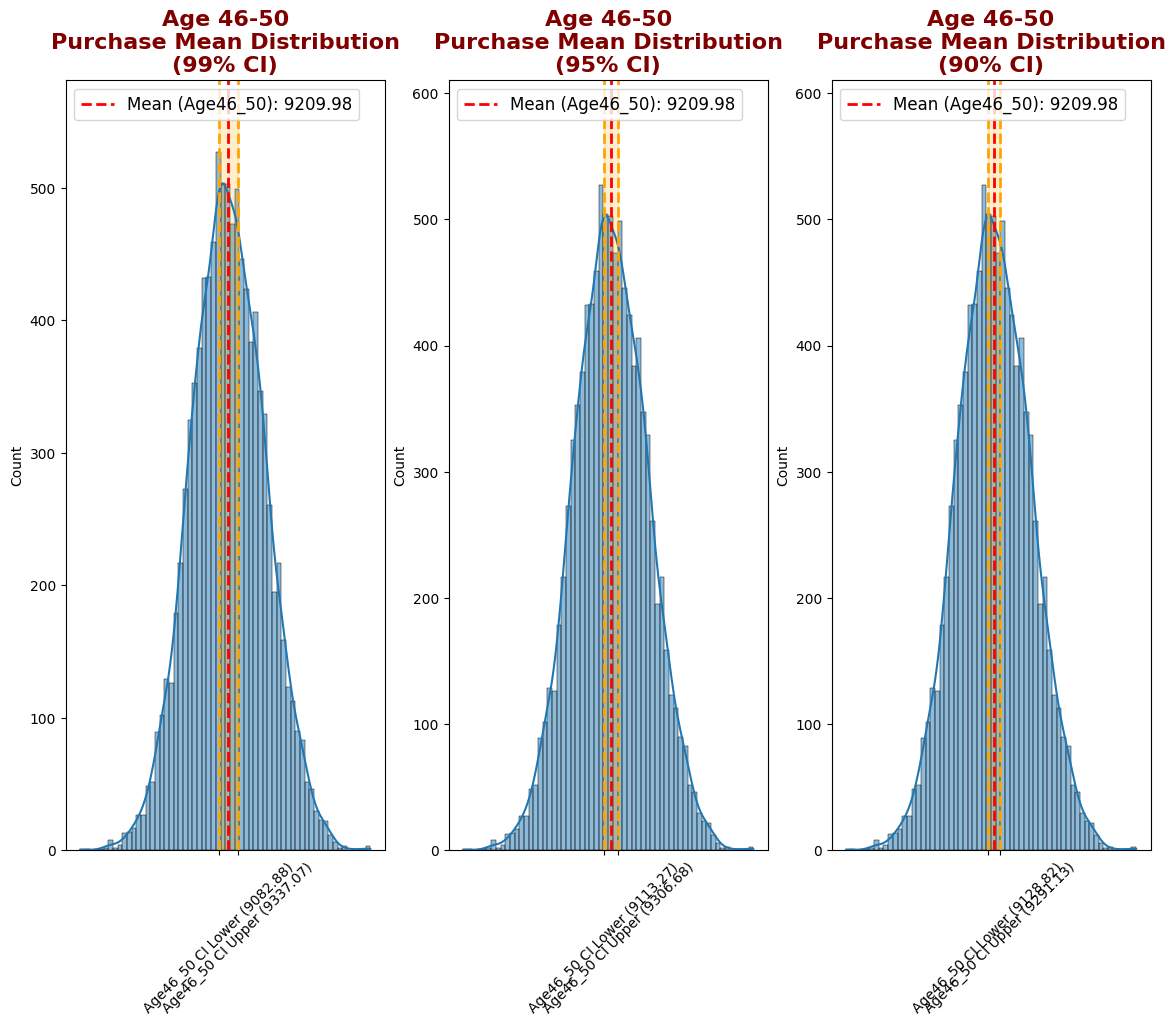

In [ ]:
# Calculate confidence intervals for Age 46-50 samples
std_age46_50 = np.array(Age46_50_sample).std() / math.sqrt(100)
age46_50_mean = np.array(Age46_50_sample).mean()
age46_50_CI99 = norm.interval(0.99, loc=age46_50_mean, scale=std_age46_50)
age46_50_CI95 = norm.interval(0.95, loc=age46_50_mean, scale=std_age46_50)
age46_50_CI90 = norm.interval(0.90, loc=age46_50_mean, scale=std_age46_50)

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(14, 10))

# Plot for 99% CI
sns.histplot(data=Age46_50_sample, kde=True, ax=ax[0])
ax[0].axvline(age46_50_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age46_50): {age46_50_mean:.2f}')
ax[0].axvline(age46_50_CI99[0], color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(age46_50_CI99[1], color='orange', linestyle='dashed', linewidth=2)
ax[0].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age46_50_CI99[0], x2=age46_50_CI99[1], color='orange', alpha=0.2)
ax[0].set_title('Age 46-50\nPurchase Mean Distribution\n(99% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[0].legend(loc='upper left', fontsize=12)
ax[0].set_xticks([age46_50_CI99[0],age46_50_CI99[1]])
ax[0].set_xticklabels([f'Age46_50 CI Lower ({age46_50_CI99[0]:.2f})',
                       f'Age46_50 CI Upper ({age46_50_CI99[1]:.2f})'], rotation=45)

# Plot for 95% CI
sns.histplot(data=Age46_50_sample, kde=True, ax=ax[1])
ax[1].axvline(age46_50_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age46_50): {age46_50_mean:.2f}')
ax[1].axvline(age46_50_CI95[0], color='orange', linestyle='dashed', linewidth=2)
ax[1].axvline(age46_50_CI95[1], color='orange', linestyle='dashed', linewidth=2)
ax[1].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age46_50_CI95[0], x2=age46_50_CI95[1], color='orange', alpha=0.2)
ax[1].set_title('Age 46-50\nPurchase Mean Distribution\n(95% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[1].legend(loc='upper left', fontsize=12)
ax[1].set_xticks([age46_50_CI95[0],age46_50_CI95[1]])
ax[1].set_xticklabels([f'Age46_50 CI Lower ({age46_50_CI95[0]:.2f})',
                       f'Age46_50 CI Upper ({age46_50_CI95[1]:.2f})'], rotation=45)

# Plot for 90% CI
sns.histplot(data=Age46_50_sample, kde=True, ax=ax[2])
ax[2].axvline(age46_50_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age46_50): {age46_50_mean:.2f}')
ax[2].axvline(age46_50_CI90[0], color='orange', linestyle='dashed', linewidth=2)
ax[2].axvline(age46_50_CI90[1], color='orange', linestyle='dashed', linewidth=2)
ax[2].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age46_50_CI90[0], x2=age46_50_CI90[1], color='orange', alpha=0.2)
ax[2].set_title('Age 46-50\nPurchase Mean Distribution\n(90% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[2].legend(loc='upper left', fontsize=12)
ax[2].set_xticks([age46_50_CI90[0],age46_50_CI90[1]])
ax[2].set_xticklabels([f'Age46_50 CI Lower ({age46_50_CI90[0]:.2f})',
                       f'Age46_50 CI Upper ({age46_50_CI90[1]:.2f})'], rotation=45)


plt.show()

# Visualising Confidence Intervals of Age Group 51-55 from Sample Mean Distribution for 99% ,95% and 90% CI levels

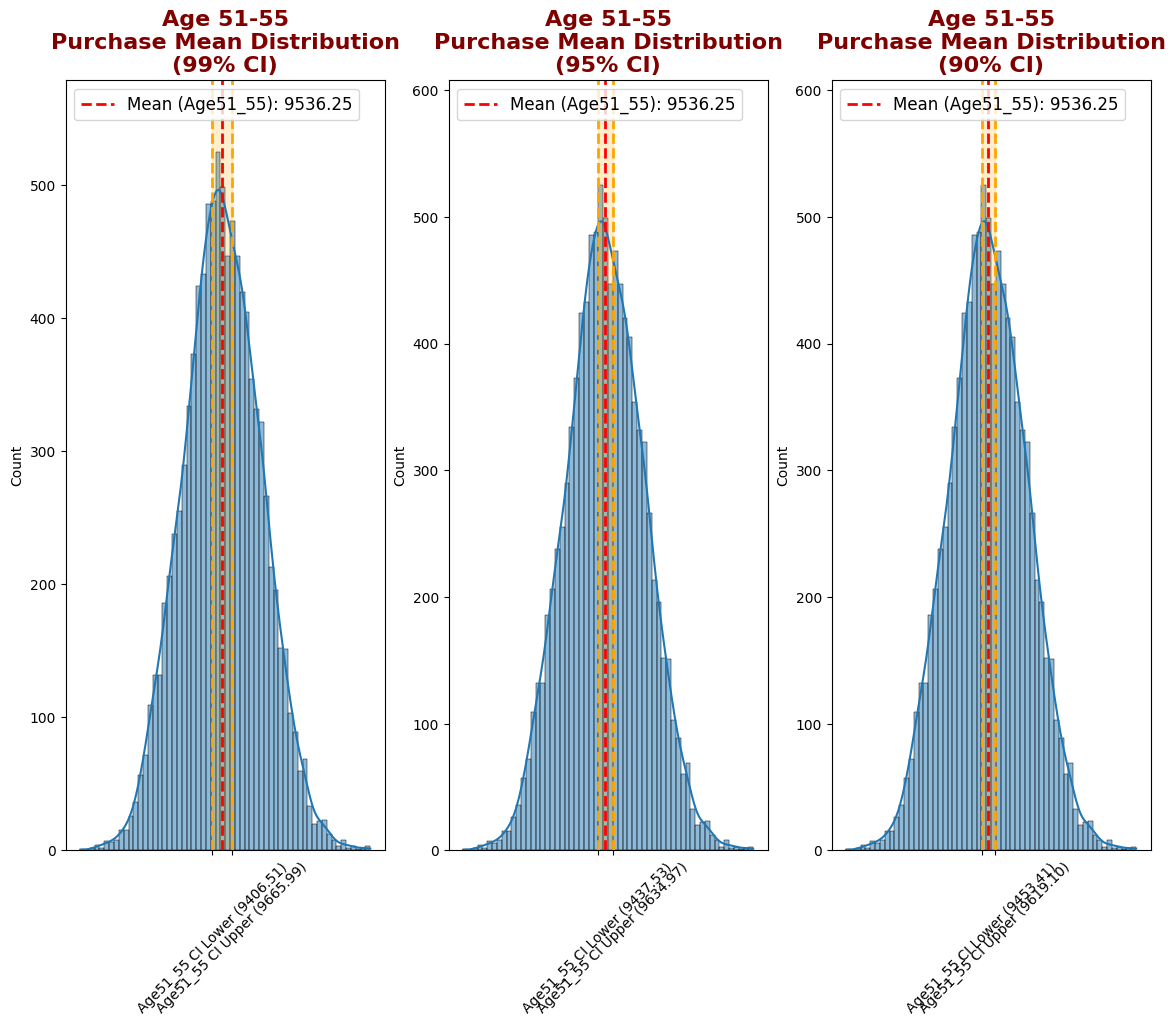

In [ ]:
# Calculate confidence intervals for Age 51-55 samples
std_age51_55 = np.array(Age51_55_sample).std() / math.sqrt(100)
age51_55_mean = np.array(Age51_55_sample).mean()
age51_55_CI99 = norm.interval(0.99, loc=age51_55_mean, scale=std_age51_55)
age51_55_CI95 = norm.interval(0.95, loc=age51_55_mean, scale=std_age51_55)
age51_55_CI90 = norm.interval(0.90, loc=age51_55_mean, scale=std_age51_55)

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(14, 10))

# Plot for 99% CI
sns.histplot(data=Age51_55_sample, kde=True, ax=ax[0])
ax[0].axvline(age51_55_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age51_55): {age51_55_mean:.2f}')
ax[0].axvline(age51_55_CI99[0], color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(age51_55_CI99[1], color='orange', linestyle='dashed', linewidth=2)
ax[0].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age51_55_CI99[0], x2=age51_55_CI99[1], color='orange', alpha=0.2)
ax[0].set_title('Age 51-55\nPurchase Mean Distribution\n(99% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[0].legend(loc='upper left', fontsize=12)
ax[0].set_xticks([age51_55_CI99[0],age51_55_CI99[1]])
ax[0].set_xticklabels([f'Age51_55 CI Lower ({age51_55_CI99[0]:.2f})',
                       f'Age51_55 CI Upper ({age51_55_CI99[1]:.2f})'], rotation=45)

# Plot for 95% CI
sns.histplot(data=Age51_55_sample, kde=True, ax=ax[1])
ax[1].axvline(age51_55_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age51_55): {age51_55_mean:.2f}')
ax[1].axvline(age51_55_CI95[0], color='orange', linestyle='dashed', linewidth=2)
ax[1].axvline(age51_55_CI95[1], color='orange', linestyle='dashed', linewidth=2)
ax[1].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age51_55_CI95[0], x2=age51_55_CI95[1], color='orange', alpha=0.2)
ax[1].set_title('Age 51-55\nPurchase Mean Distribution\n(95% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[1].legend(loc='upper left', fontsize=12)
ax[1].set_xticks([age51_55_CI95[0],age51_55_CI95[1]])
ax[1].set_xticklabels([f'Age51_55 CI Lower ({age51_55_CI95[0]:.2f})',
                       f'Age51_55 CI Upper ({age51_55_CI95[1]:.2f})'], rotation=45)

# Plot for 90% CI
sns.histplot(data=Age51_55_sample, kde=True, ax=ax[2])
ax[2].axvline(age51_55_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age51_55): {age51_55_mean:.2f}')
ax[2].axvline(age51_55_CI90[0], color='orange', linestyle='dashed', linewidth=2)
ax[2].axvline(age51_55_CI90[1], color='orange', linestyle='dashed', linewidth=2)
ax[2].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age51_55_CI90[0], x2=age51_55_CI90[1], color='orange', alpha=0.2)
ax[2].set_title('Age 51-55\nPurchase Mean Distribution\n(90% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[2].legend(loc='upper left', fontsize=12)
ax[2].set_xticks([age51_55_CI90[0],age51_55_CI90[1]])
ax[2].set_xticklabels([f'Age51_55 CI Lower ({age51_55_CI90[0]:.2f})',
                       f'Age51_55 CI Upper ({age51_55_CI90[1]:.2f})'], rotation=45)


plt.show()

# Visualising Confidence Intervals of Age Group 55+ from Sample Mean Distribution for 99% ,95% and 90% CI levels

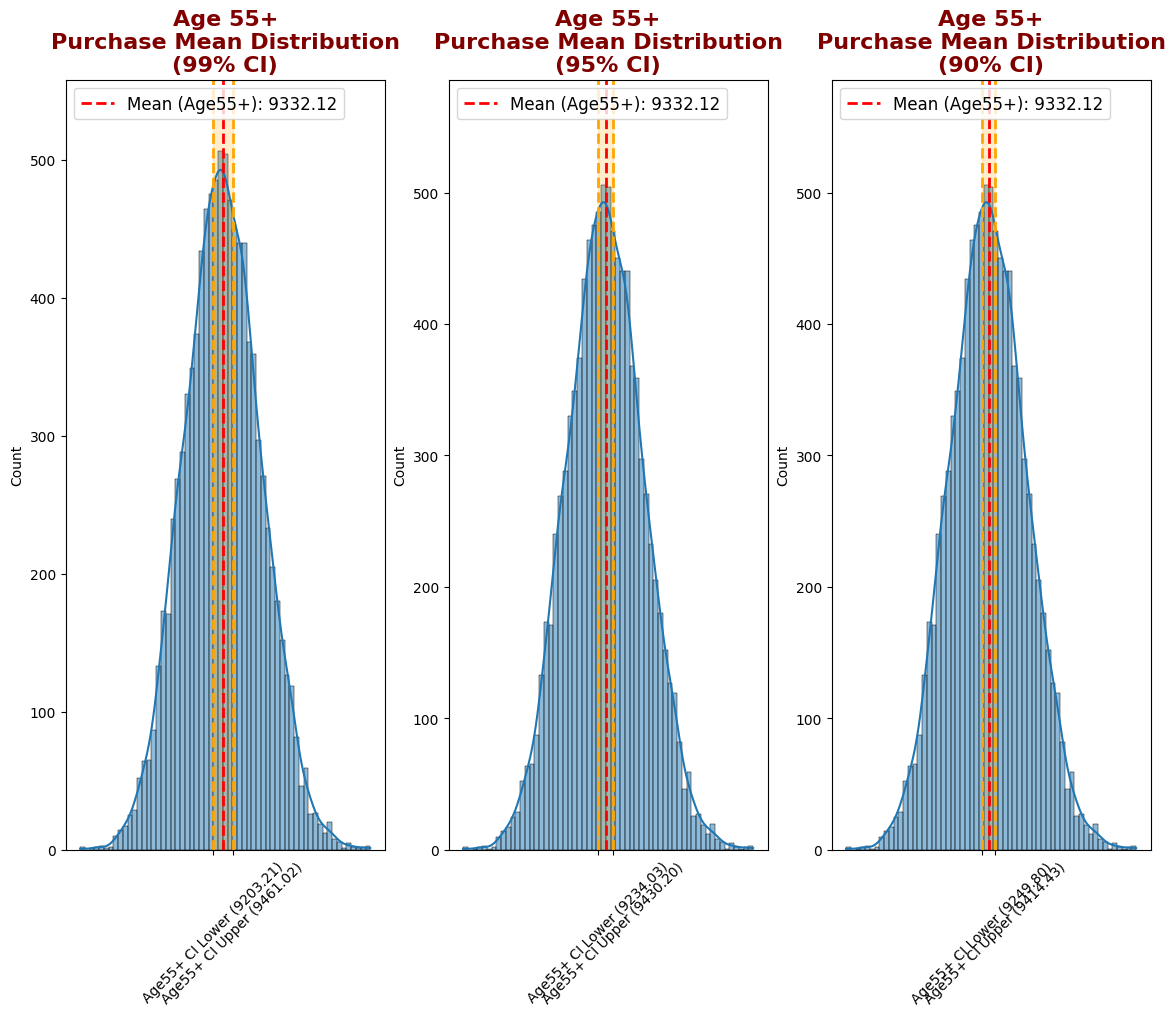

In [ ]:
# Calculate confidence intervals for Age 55+ samples
std_age56 = np.array(Age56_sample).std() / math.sqrt(100)
age56_mean = np.array(Age56_sample).mean()
age56_CI99 = norm.interval(0.99, loc=age56_mean, scale=std_age56)
age56_CI95 = norm.interval(0.95, loc=age56_mean, scale=std_age56)
age56_CI90 = norm.interval(0.90, loc=age56_mean, scale=std_age56)

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(14, 10))

# Plot for 99% CI
sns.histplot(data=Age56_sample, kde=True, ax=ax[0])
ax[0].axvline(age56_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age55+): {age56_mean:.2f}')
ax[0].axvline(age56_CI99[0], color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(age56_CI99[1], color='orange', linestyle='dashed', linewidth=2)
ax[0].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age56_CI99[0], x2=age56_CI99[1], color='orange', alpha=0.2)
ax[0].set_title('Age 55+\nPurchase Mean Distribution\n(99% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[0].legend(loc='upper left', fontsize=12)
ax[0].set_xticks([age56_CI99[0],age56_CI99[1]])
ax[0].set_xticklabels([f'Age55+ CI Lower ({age56_CI99[0]:.2f})',
                       f'Age55+ CI Upper ({age56_CI99[1]:.2f})'], rotation=45)

# Plot for 95% CI
sns.histplot(data=Age56_sample, kde=True, ax=ax[1])
ax[1].axvline(age56_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age55+): {age56_mean:.2f}')
ax[1].axvline(age56_CI95[0], color='orange', linestyle='dashed', linewidth=2)
ax[1].axvline(age56_CI95[1], color='orange', linestyle='dashed', linewidth=2)
ax[1].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age56_CI95[0], x2=age56_CI95[1], color='orange', alpha=0.2)
ax[1].set_title('Age 55+\nPurchase Mean Distribution\n(95% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[1].legend(loc='upper left', fontsize=12)
ax[1].set_xticks([age56_CI95[0],age56_CI95[1]])
ax[1].set_xticklabels([f'Age55+ CI Lower ({age56_CI95[0]:.2f})',
                       f'Age55+ CI Upper ({age56_CI95[1]:.2f})'], rotation=45)

# Plot for 90% CI
sns.histplot(data=Age56_sample, kde=True, ax=ax[2])
ax[2].axvline(age56_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Age55+): {age56_mean:.2f}')
ax[2].axvline(age56_CI90[0], color='orange', linestyle='dashed', linewidth=2)
ax[2].axvline(age56_CI90[1], color='orange', linestyle='dashed', linewidth=2)
ax[2].fill_betweenx(y=[0, ax[0].get_ylim()[1]], x1=age56_CI90[0], x2=age56_CI90[1], color='orange', alpha=0.2)
ax[2].set_title('Age 55+\nPurchase Mean Distribution\n(90% CI)', color='maroon', fontsize=16, fontweight='bold')
ax[2].legend(loc='upper left', fontsize=12)
ax[2].set_xticks([age56_CI90[0],age56_CI90[1]])
ax[2].set_xticklabels([f'Age55+ CI Lower ({age56_CI90[0]:.2f})',
                       f'Age55+ CI Upper ({age56_CI90[1]:.2f})'], rotation=45)


plt.show()

# Conclusion:
## Walmart being the one of the largest online e commerce platform there are few observations from the analysis which can help them in increasing sales.

### 1. From the CI analysis of mean sample distribution of data we can conclude that Men Sprend more than Females and CIs dont overlap for all three 99%/95%/90% CI Intervals. So there is a room for further analysis of the existing female purchase behavior of product categories and marketing those for female audiences.
### 2. Assuming 95 % Confidence Interval, We can say that Mean Population Spendings of
### Male lies between 9340 to 9540.
### Female lies between 8646 to 8835.
### Married lies between 9161 to 9358.
### UnMarried lies between 9164 to 9365.
### Age Group 0-17 lies between 8828 to 9026.
### Age Group 18-25 lies between 9076 to 9275.
### Age Group 26-35 lies between 9143 to 9342.
### Age Group 36-45 lies between 9231 to 9427.
### Age Group 46-50 lies between 9113 to 9306.
### Age Group 51-55 lies between 9437 to 9634.
### Age Group 55+ lies bwetween 9234 to 9430.
### 2. Even though people of Age group 26-35 contribute 40 % of total sales , from Sample Mean Distribution we could see customers with age group 51-55 having higher CI compared to other age groups indicating future potential sales contribution from these segments.
### 3. Mean Sample distribution of Married and Unmarried samples is the same indicating there is no significant changes in the spending behaviour of Singles post marriage.